<a href="https://colab.research.google.com/github/data-enthusiast-shubhs/AlmaBetter_Telecom_Churn_Analysis_EDA_Python/blob/main/Capstone_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  ***CUSTOMER CHURN PREDICTION IN THE TELECOM SECTOR***



# **1. Business understanding**

Telecom companies often struggle with customer churn, which refers to the number of customers who leave the company over a given period. In this project, we aimed predict future churning possibilities and to identify the factors that contribute to customer churn.


**Problem Statement**










The provided churn datasets from Telecom contain cleaned customer activity data (features) along with a churn label indicating whether a customer has canceled their subscription. The goal is to explore and analyze these two datasets to identify the key factors driving customer churn and to propose actionable recommendations to improve customer retention. Also to predict future churning possibilities.

 **Business Objective**

*   Identifying the key cause of the customer churn
*   Provide steps to retain the valuable customer
*  Predecting future churning

 **DS Objective**

*   Customer churn prediction
*   Shap Analysis to detect causes of customer churn + providing solutiuons

# **2. Data Understanding**


### 2.1Import Libraries

In [ ]:
# Import Libraries
import ast
import joblib  # Required for saving and loading models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import shap
import xgboost as xgb

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, classification_report,
                             ConfusionMatrixDisplay, f1_score, precision_score,
                             recall_score, roc_auc_score, roc_curve)
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils.class_weight import compute_sample_weight

# Ensure inline plotting
%matplotlib inline

### 2.2 Dataset Loading

In [ ]:
df_20 = pd.read_csv(r"/content/churn-bigml-20.csv")
df_80 = pd.read_csv(r"/content/churn-bigml-80.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Load Dataset
telecom_df = pd.concat([df_80, df_20], ignore_index=True)#concat just to understand the overall dataset
telecom_df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,WI,114,415,No,Yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
3329,AL,106,408,No,Yes,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
3330,VT,60,415,No,No,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
3331,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False


### 2.3 Dataset OverView

In [ ]:
# Dataset First Look
telecom_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
# Dataset Rows & Columns count
telecom_df.shape

(3333, 20)

In [ ]:
# Dataset Info
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

### 2.4 Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
telecom_df.duplicated().sum()

0

### 2.5 Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
telecom_df.isnull().sum()

,0
State,0
Account length,0
Area code,0
International plan,0
Voice mail plan,0
Number vmail messages,0
Total day minutes,0
Total day calls,0
Total day charge,0
Total eve minutes,0


=> The given dataset is from telecom industry. This dataset consists of 3333 rows and 20 columns of customer activity data as Area code, plan details, call details along with churn labels specifying whether the customer cancelled the subscription. There is no missing and duplicate values in the dataset.

### 2.6 Understanding our variables

In [ ]:
# Dataset Columns
telecom_df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn', 'Total calls', 'Total mins', 'Total charge', 'min_per_call',
       'charge_per_min', 'Intl_min_per_call', 'Intl_charge_per_min'],
      dtype='object')

In [ ]:
# Dataset Describe
telecom_df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,...,Total intl calls,Total intl charge,Customer service calls,Total calls,Total mins,Total charge,min_per_call,charge_per_min,Intl_min_per_call,Intl_charge_per_min
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,...,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3315.000000,3315.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,...,4.479448,2.764581,1.562856,300.657666,581.627483,56.685173,1.960287,0.097289,3.112385,0.270057
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,...,2.461214,0.753773,1.315491,34.328232,89.969330,10.487816,0.382226,0.008612,2.260809,0.000329
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,...,0.000000,0.000000,0.000000,188.000000,275.200000,19.980000,0.781818,0.063353,0.216667,0.268182
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,...,3.000000,2.300000,1.000000,278.000000,521.000000,49.590000,1.699336,0.091679,1.685714,0.269811
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,...,4.000000,2.780000,1.000000,301.000000,583.100000,56.630000,1.933439,0.097424,2.460000,0.270000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,...,6.000000,3.270000,2.000000,324.000000,642.500000,63.650000,2.195885,0.103046,3.800000,0.270297
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,...,20.000000,5.400000,9.000000,410.000000,876.900000,92.560000,3.693644,0.127061,18.200000,0.272727


### Variables Description

* **State                :**All 51 states

* **Account Length       :** How long account has been active

* **Area Code            :** Code Number of Area

* **lntl Plan            :** International plan activated ( yes, no )

* **VMail Plan           :** Voice Mail plan activated ( yes ,no )

* **VMail Message        :** No.of voice mail messages

* **Day Mins             :** Total day minutes used

* **Day calls**         : Total day calls made

* **Day Charge**         : Total day charge

* **Eve Mins**          : Total evening minutes

* **Eve Calls**          : Total evening calls

* **Eve Charge**         : Total evening charge

* **Night Mins**         : Total night minutes

* **Night Calls**        : Total night calls

* **Night Charge**      : Total night charge

* **Intl Mins**         : Total International minutes used

* **Intl Calls**         : Total International calls made

* **Intl Charge**        : Total International charge

* **CustServ calls**    : Number of customer service calls made

* **Churn**             : Customer churn (Target Variable True=1, False=0)

### 2.6 Unique values 

In [ ]:
# Check Unique Values for each variable.
for i in telecom_df.columns:
  print("No. of unique values in ",i,"is", telecom_df[i].nunique())

No. of unique values in  State is 51
No. of unique values in  Account length is 212
No. of unique values in  Area code is 3
No. of unique values in  International plan is 2
No. of unique values in  Voice mail plan is 2
No. of unique values in  Number vmail messages is 46
No. of unique values in  Total day minutes is 1667
No. of unique values in  Total day calls is 119
No. of unique values in  Total day charge is 1667
No. of unique values in  Total eve minutes is 1611
No. of unique values in  Total eve calls is 123
No. of unique values in  Total eve charge is 1440
No. of unique values in  Total night minutes is 1591
No. of unique values in  Total night calls is 120
No. of unique values in  Total night charge is 933
No. of unique values in  Total intl minutes is 162
No. of unique values in  Total intl calls is 21
No. of unique values in  Total intl charge is 162
No. of unique values in  Customer service calls is 10
No. of unique values in  Churn is 2
No. of unique values in  Total calls 

### 2.7 Data Wrangling

In [ ]:
# Write your code to make your dataset analysis ready.
print("No. of customers Churning :",telecom_df[telecom_df['Churn']==True].Churn.count()) # Total No of Customers Churning

# Variable Assigning to churned data
churn_df = telecom_df[telecom_df['Churn']==True]

# Total No of Unique Area Code
print("No of Unique Area Code :", telecom_df['Area code'].nunique())

# Customers On which Internaltion plan is activated
print("No of customer with international plan activated :", telecom_df[telecom_df['International plan']=='Yes']['International plan'].count())

# Customers On which Voice mail plan is activated
print("No of customer with Voice mail plan activated :", telecom_df[telecom_df['Voice mail plan']=='Yes']['Voice mail plan'].count())

churn_df

No. of customers Churning : 483
No of Unique Area Code : 3
No of customer with international plan activated : 323
No of customer with Voice mail plan activated : 922


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total intl charge,Customer service calls,Churn,Total calls,Total mins,Total charge,min_per_call,charge_per_min,Intl_min_per_call,Intl_charge_per_min
18,CO,77,408,No,No,0,62.4,89,10.61,169.9,...,1.54,5,True,274,441.9,34.48,1.612774,0.078027,0.950000,0.270175
28,AZ,12,408,No,No,0,249.6,118,42.43,252.4,...,3.19,1,True,327,782.2,76.49,2.392049,0.097788,3.933333,0.270339
35,MD,135,408,Yes,Yes,41,173.1,85,29.43,203.9,...,3.94,0,True,270,499.2,52.26,1.848889,0.104688,0.973333,0.269863
45,WY,87,415,No,No,0,151.0,83,25.67,219.7,...,2.62,5,True,326,574.6,53.52,1.762577,0.093143,3.233333,0.270103
48,CO,121,408,No,Yes,30,198.4,129,33.73,75.3,...,1.57,3,True,283,454.9,48.28,1.607420,0.106133,1.933333,0.270690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3272,CO,130,408,No,No,0,271.8,129,46.21,237.2,...,2.35,4,True,348,719.1,75.82,2.066379,0.105437,4.350000,0.270115
3281,MT,100,415,No,No,0,113.3,96,19.26,197.9,...,3.16,4,True,278,595.7,48.88,2.142806,0.082055,5.850000,0.270085
3318,WA,84,415,No,No,0,289.1,100,49.15,233.8,...,3.43,2,True,345,746.4,79.08,2.163478,0.105949,6.350000,0.270079
3319,MD,133,510,No,No,0,295.0,141,50.15,223.6,...,3.48,2,True,351,748.0,79.48,2.131054,0.106257,3.225000,0.269767


In [ ]:
# % of total customers churning
print("Total no. of customers :", telecom_df.Churn.count())
perc_churn = (churn_df.Churn.count()/telecom_df.Churn.count())*100
print(f"Percentage of customer churning : {round(perc_churn,2)}%")

Total no. of customers : 3333
Percentage of customer churning : 14.49%


In [ ]:
#Statewise customer churning
state_cust_churn = churn_df.groupby(['State'])['Churn'].value_counts().reset_index(name='Churn_customer')
print(state_cust_churn.sum())
state_cust_churn

State             AKALARAZCACOCTDCDEFLGAHIIAIDILINKSKYLAMAMDMEMI...
Churn                                                            51
Churn_customer                                                  483
dtype: object


,State,Churn,Churn_customer
0,AK,True,3
1,AL,True,8
2,AR,True,11
3,AZ,True,4
4,CA,True,9
5,CO,True,9
6,CT,True,12
7,DC,True,5
8,DE,True,9
9,FL,True,8


In [ ]:
# Account length wise churn data
acc_len_churn = churn_df.groupby(['Account length'])['Churn'].value_counts().reset_index(name='values')
print(acc_len_churn.sum())
acc_len_churn
 #kadech bka mahom abo yani

Account length    17028
Churn               164
values              483
dtype: int64


,Account length,Churn,values
0,1,True,1
1,2,True,1
2,12,True,1
3,13,True,1
4,16,True,1
...,...,...,...
159,208,True,1
160,209,True,1
161,212,True,1
162,224,True,1


In [ ]:
# Area code wise Churn Count
Area_code_churn_count = churn_df.groupby(['Area code'])['Churn'].value_counts().reset_index(name='Counts')
Area_code_churn_count
# kadech men wehed churna par area

,Area code,Churn,Counts
0,408,True,122
1,415,True,236
2,510,True,125


In [ ]:
#Poor Connectivity by intersection of state by area code
Area_state_churn = churn_df.groupby(['Area code'])['State'].unique().reset_index(name='Unique state')
Area_state_churn

,Area code,Unique state
0,408,"[CO, AZ, MD, NY, IN, MS, VT, VA, OH, AL, MT, N..."
1,415,"[WY, DC, NJ, NV, MS, OH, AK, MD, OR, VT, MN, M..."
2,510,"[TX, ME, MS, FL, SD, WI, DE, KS, OH, WV, SC, G..."


In [ ]:
# Percentage of People with and without Voice mail Plan churning to other networks
vmail_plan_churn = (telecom_df.groupby(['Voice mail plan'])['Churn'].mean()*100).reset_index(name='Churn %')
print(vmail_plan_churn)

# Total number of people churning with vmail plan
churn_vmail_yes = churn_df[churn_df['Voice mail plan']=='Yes']
print(f"No of Customers churning having vmail plan is {churn_vmail_yes['Voice mail plan'].value_counts()[0]}")

# Total number of people churning without vmail plan
churn_vmail_no = churn_df[churn_df['Voice mail plan']=='No']
print(f"No of Customers churning not having vmail plan is {churn_vmail_no['Voice mail plan'].value_counts()[0]}")


  Voice mail plan    Churn %
0              No  16.715056
1             Yes   8.676790
No of Customers churning having vmail plan is 80
No of Customers churning not having vmail plan is 403


<ipython-input-261-ef4f699fb8ff>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"No of Customers churning having vmail plan is {churn_vmail_yes['Voice mail plan'].value_counts()[0]}")
<ipython-input-261-ef4f699fb8ff>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"No of Customers churning not having vmail plan is {churn_vmail_no['Voice mail plan'].value_counts()[0]}")


In [ ]:
# Percentage of People with number of Voice mail messages churning/not-churning to other networks
vmail_mssg_churn = telecom_df.groupby(['Churn'])['Number vmail messages'].mean().reset_index(name='perc_vmail_mssg')
vmail_mssg_churn


,Churn,perc_vmail_mssg
0,False,8.604561
1,True,5.115942


In [ ]:
# Day Data
# Percentage of people churning with the average day mins,calls and charge.
telecom_df.groupby(['Churn'])['Total day minutes'].mean().reset_index(name='perc_day_mins')


,Churn,perc_day_mins
0,False,175.175754
1,True,206.914079


In [ ]:
telecom_df.groupby(['Churn'])['Total day calls'].mean().reset_index(name='perc_day_calls')
# bivariée analysist :: tvisualisi tehseb el target en fct men kol var features tchurni en fct mel les colonnes lkol

,Churn,perc_day_calls
0,False,100.283158
1,True,101.335404


In [ ]:
telecom_df.groupby(['Churn'])['Total day charge'].mean().reset_index(name='perc_day_charge')

,Churn,perc_day_charge
0,False,29.780421
1,True,35.175921


In [ ]:
# Evening Data
# Percentage of people churning with the average Evening mins,calls and charge.
telecom_df.groupby(['Churn'])['Total eve minutes'].mean().reset_index(name='perc_eve_mins')


,Churn,perc_eve_mins
0,False,199.043298
1,True,212.410145


In [ ]:
telecom_df.groupby(['Churn'])['Total eve calls'].mean().reset_index(name='perc_eve_calls')


,Churn,perc_eve_calls
0,False,100.038596
1,True,100.561077


In [ ]:
telecom_df.groupby(['Churn'])['Total eve charge'].mean().reset_index(name='perc_eve_charge')

,Churn,perc_eve_charge
0,False,16.918909
1,True,18.054969


In [ ]:
# Night Data
# Percentage of people churning with the average Night mins,calls and charge.
telecom_df.groupby(['Churn'])['Total night minutes'].mean().reset_index(name='perc_night_mins')


,Churn,perc_night_mins
0,False,200.133193
1,True,205.231677


In [ ]:
telecom_df.groupby(['Churn'])['Total night calls'].mean().reset_index(name='perc_night_calls')


,Churn,perc_night_calls
0,False,100.058246
1,True,100.399586


In [ ]:
telecom_df.groupby(['Churn'])['Total night charge'].mean().reset_index(name='perc_night_charge')

,Churn,perc_night_charge
0,False,9.006074
1,True,9.235528


In [ ]:
# Intl Call Data
# Percentage of people churning with the average international mins,calls and charge.
telecom_df.groupby(['Churn'])['Total intl minutes'].mean().reset_index(name='perc_intl_mins')


,Churn,perc_intl_mins
0,False,10.158877
1,True,10.700000


In [ ]:
telecom_df.groupby(['Churn'])['Total intl calls'].mean().reset_index(name='perc_intl_calls')


,Churn,perc_intl_calls
0,False,4.532982
1,True,4.163561


In [ ]:

telecom_df.groupby(['Churn'])['Total intl charge'].mean().reset_index(name='perc_intl_charge')

,Churn,perc_intl_charge
0,False,2.743404
1,True,2.889545


In [ ]:
# Combining of day,evening and night calls, mins and charges
telecom_df['Total calls'] = telecom_df.loc[:,['Total day calls','Total eve calls', 'Total night calls']].sum(axis=1)
telecom_df['Total mins'] = telecom_df.loc[:,['Total day minutes','Total eve minutes', 'Total night minutes']].sum(axis=1)
telecom_df['Total charge'] = telecom_df.loc[:,['Total day charge','Total eve charge', 'Total night charge']].sum(axis=1)

# mins per call
telecom_df['min_per_call'] = telecom_df['Total mins']/telecom_df['Total calls']

#charge per min
telecom_df['charge_per_min'] = telecom_df['Total charge']/telecom_df['Total mins']

# International mins per call
telecom_df['Intl_min_per_call'] = telecom_df['Total intl minutes']/telecom_df['Total intl calls']

#International charge per min
telecom_df['Intl_charge_per_min'] = telecom_df['Total intl charge']/telecom_df['Total intl minutes']
#multi varieted analysist :: target maha akther men variables :: labed li tchurnet en fct des hajet


In [ ]:
# Customer Service Call data
print("No of unique service calls made :", telecom_df['Customer service calls'].nunique())

# Percentage of churning based on the customer service calls made
(telecom_df.groupby(['Customer service calls'])['Churn'].mean()*100).reset_index(name='Perc_churned')
#kadech men wehed jewah 5rf4f mara service call churna

No of unique service calls made : 10


,Customer service calls,Perc_churned
0,0,13.199426
1,1,10.330229
2,2,11.462451
3,3,10.256410
4,4,45.783133
5,5,60.606061
6,6,63.636364
7,7,55.555556
8,8,50.000000
9,9,100.000000


### 2.7 Data Visualisation  

#### 2.7.1 Univariate Analysis


Churn
False    2850
True      483
Name: count, dtype: int64
 


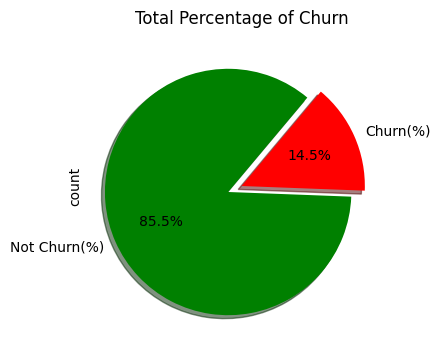

In [ ]:
# Chart - 1  Dependent Column Value Counts
print(telecom_df.Churn.value_counts())
print(" ")

# Dependent Variable Column Visualization
telecom_df['Churn'].value_counts().plot( kind='pie',figsize=(4,4),
                                        autopct="%1.1f%%",
startangle=50,
shadow=True,
labels=['Not Churn(%)','Churn(%)'],
colors=['green','red'],explode=[0.12,0])
plt.title('Total Percentage of Churn')

# Displaying chart
plt.show()

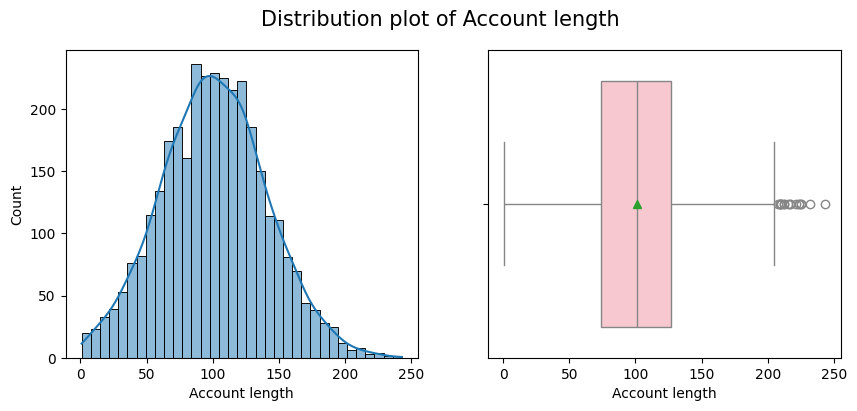

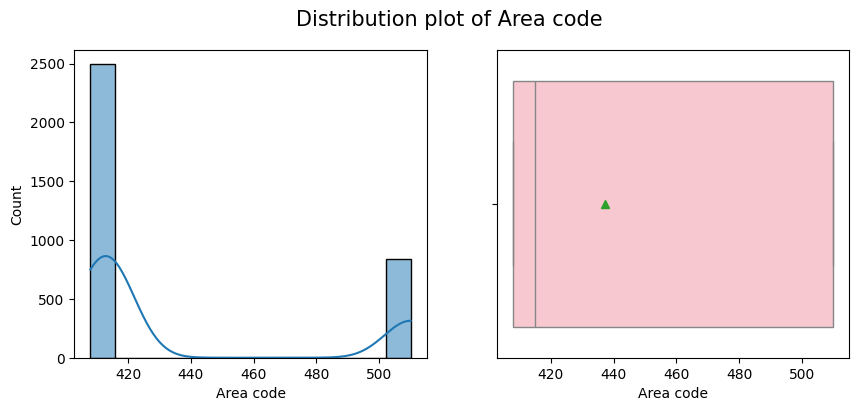

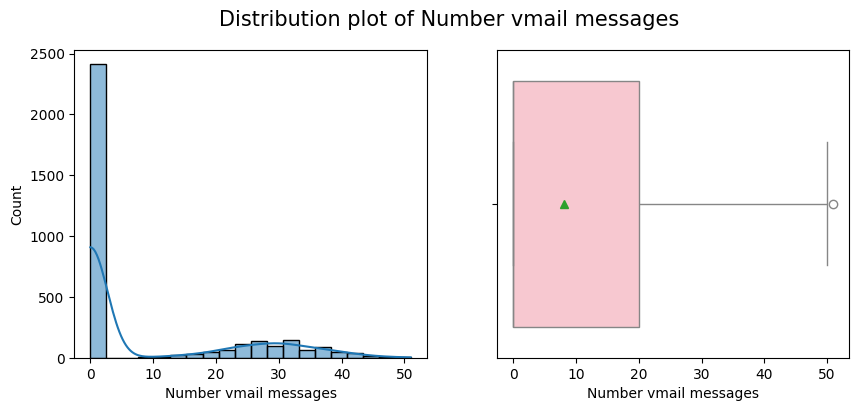

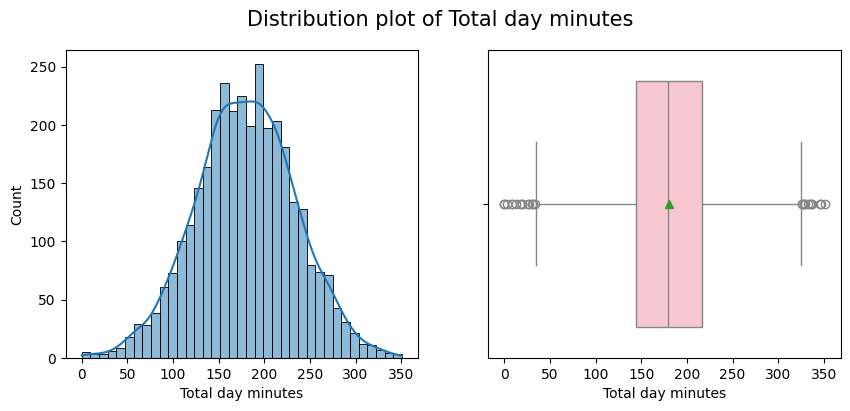

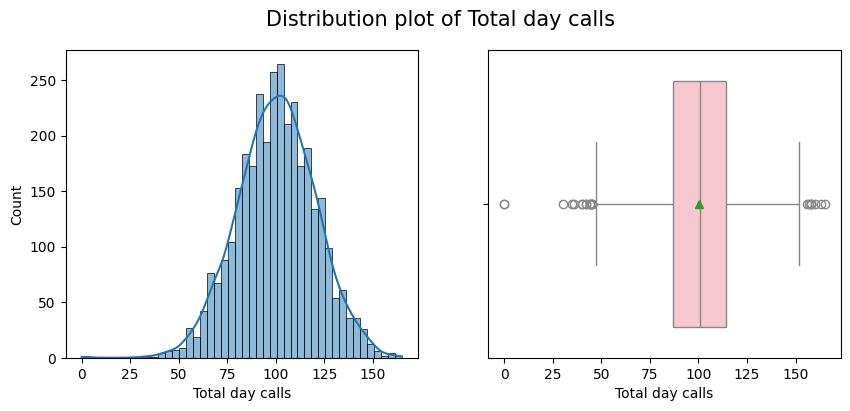

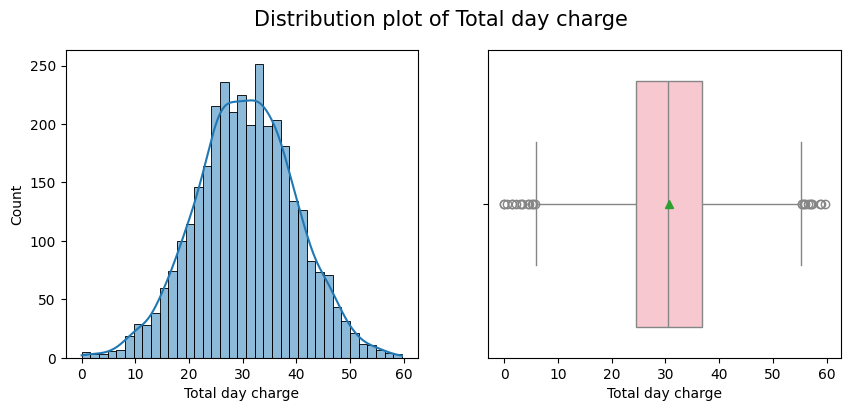

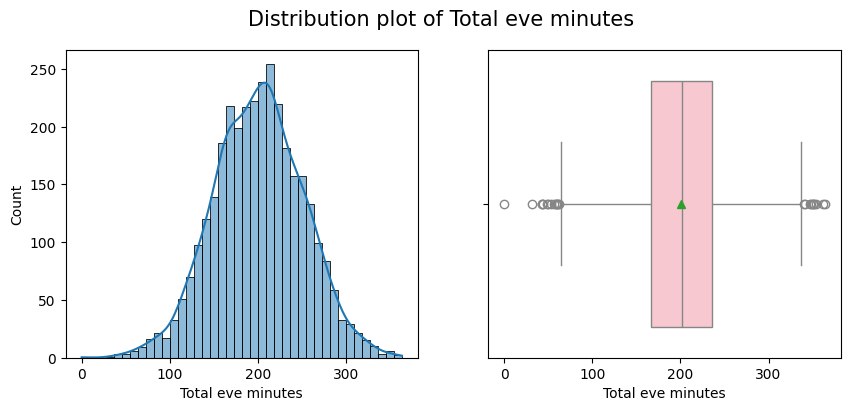

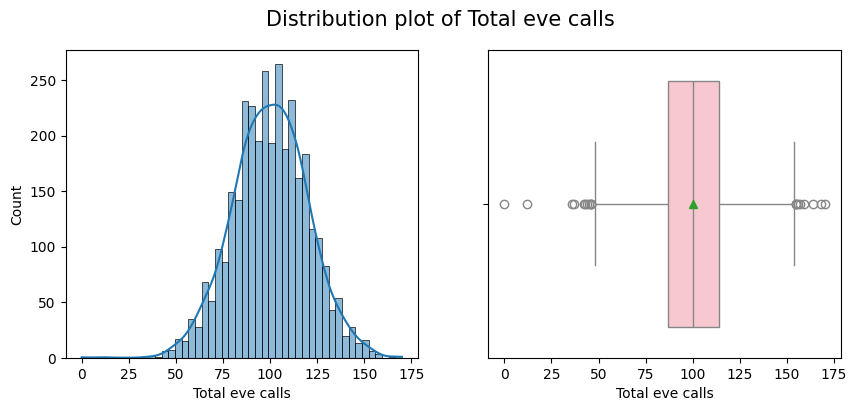

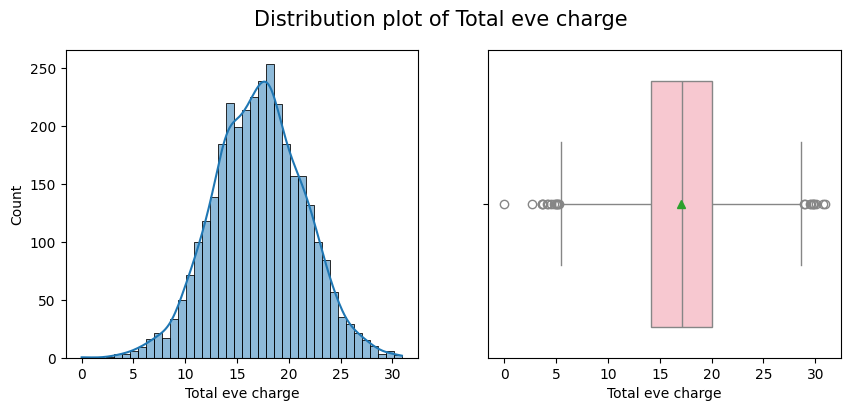

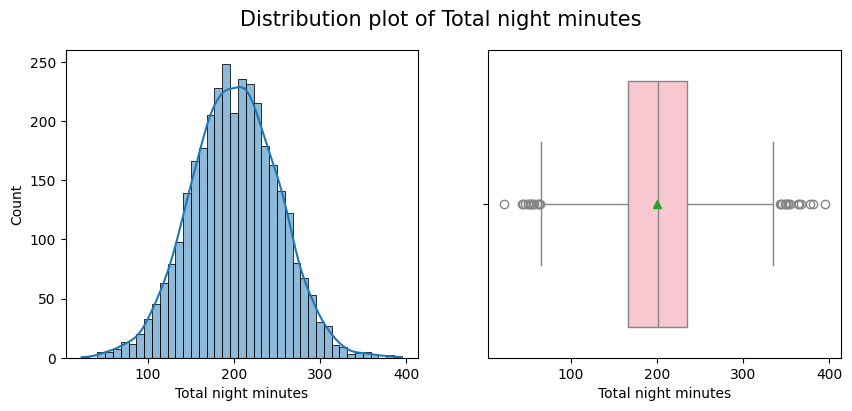

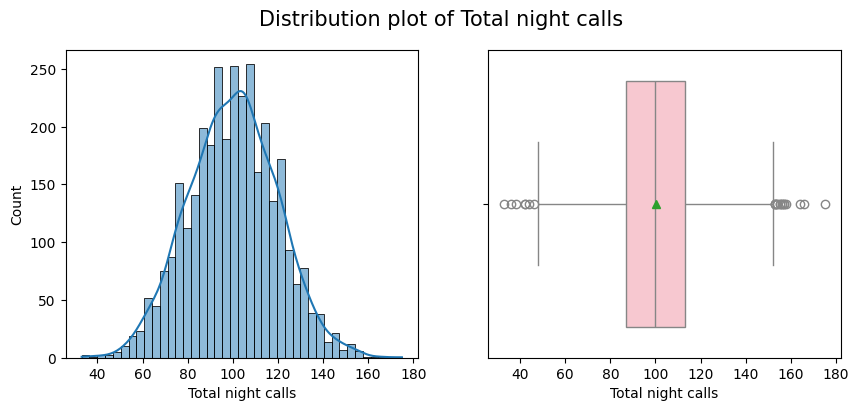

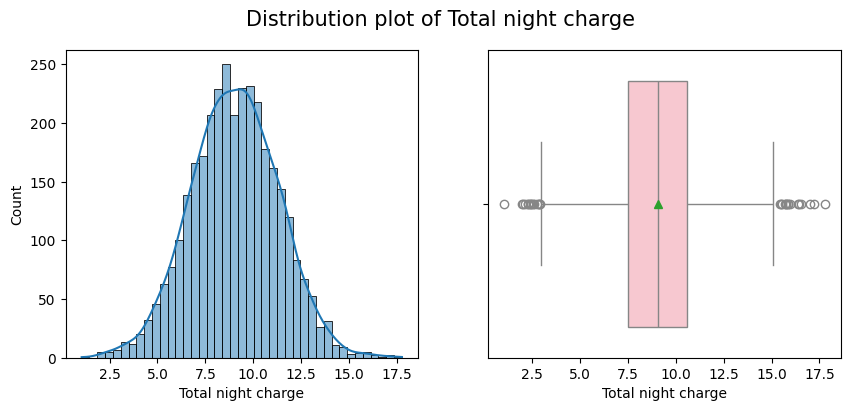

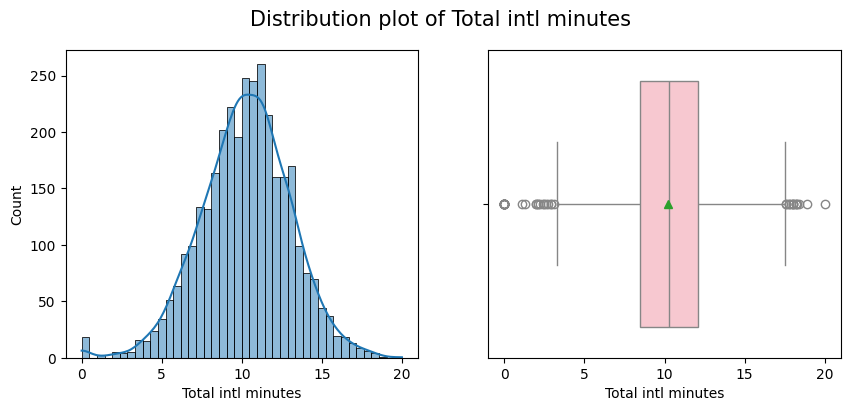

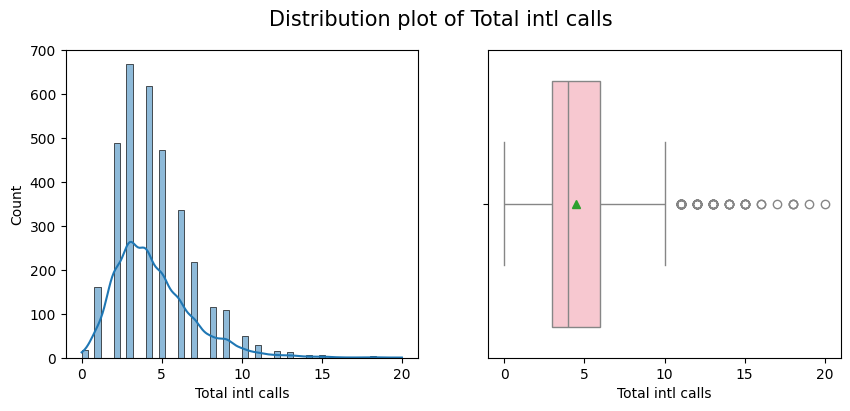

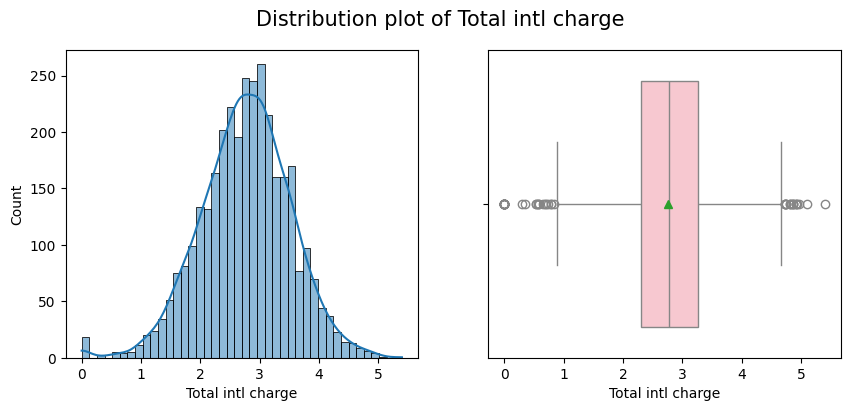

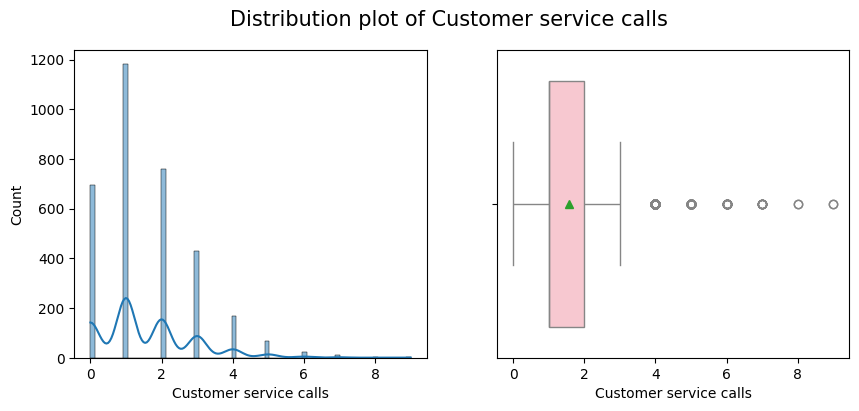

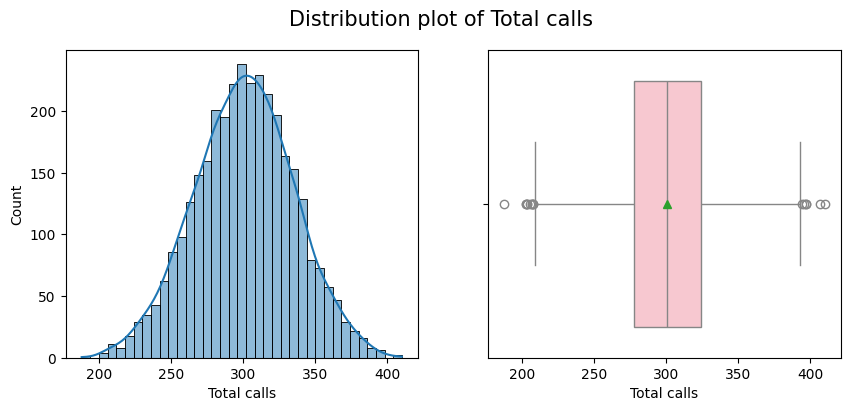

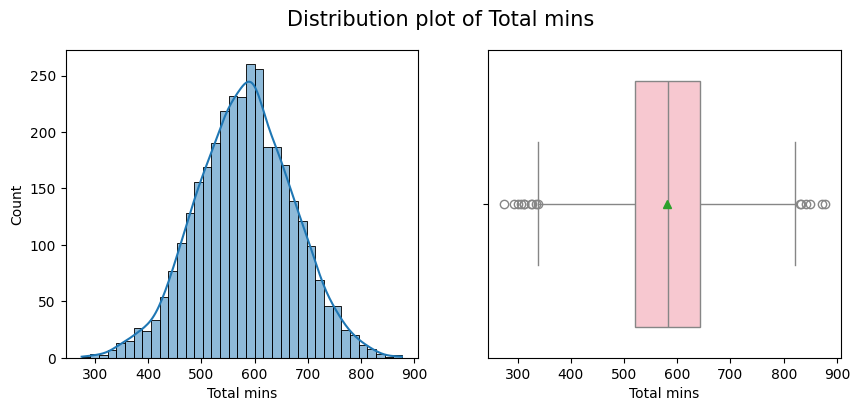

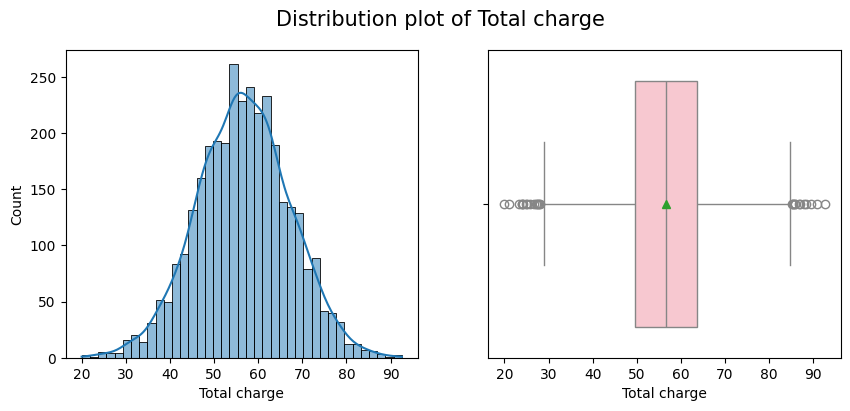

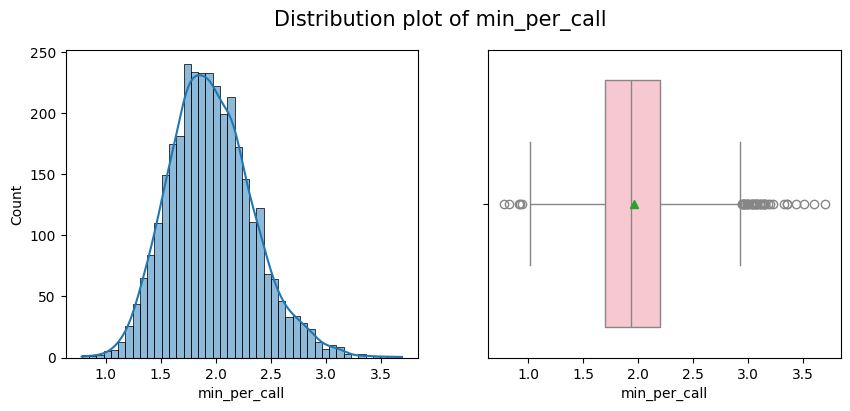

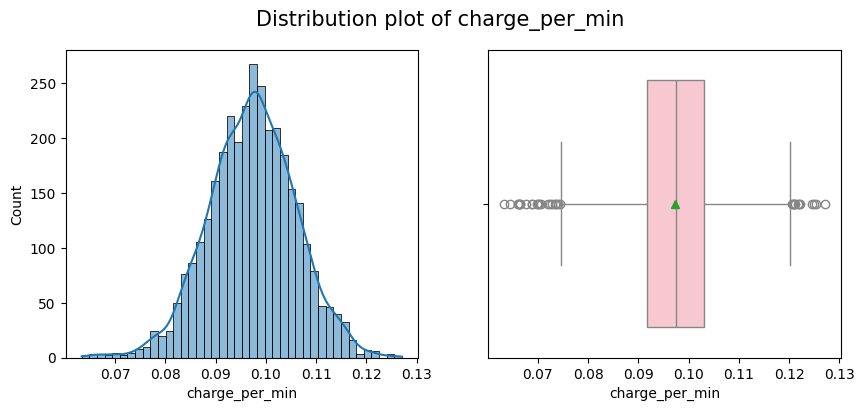

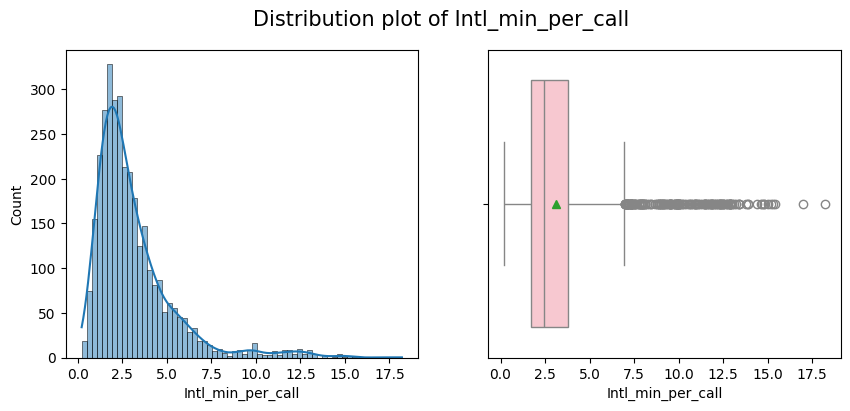

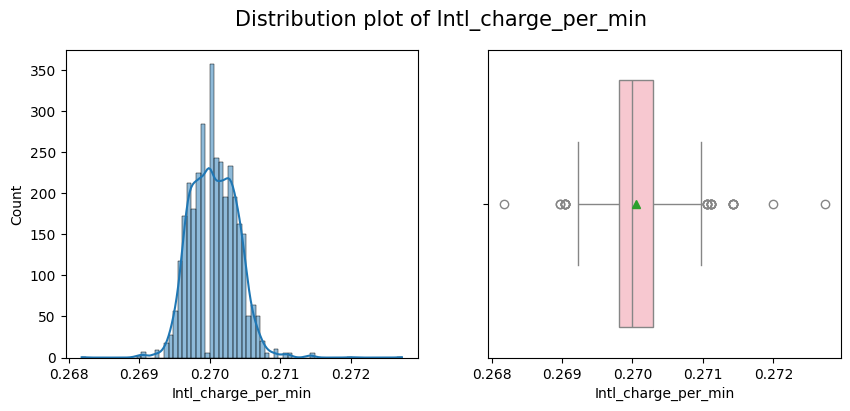

In [ ]:
# Chart - 2 Visualizing code of histogram plot & boxplot for each columns to know the data distribution , and outliers detections
for col in telecom_df.describe().columns:
    fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(10,4))
    sns.histplot(telecom_df[col], ax = axes[0],kde = True)
    sns.boxplot(telecom_df[col], ax = axes[1],orient='h',showmeans=True,color='pink')
    fig.suptitle("Distribution plot of "+ col, fontsize = 15)
    plt.show()

#### 2.7.2 Bivariate Analysis



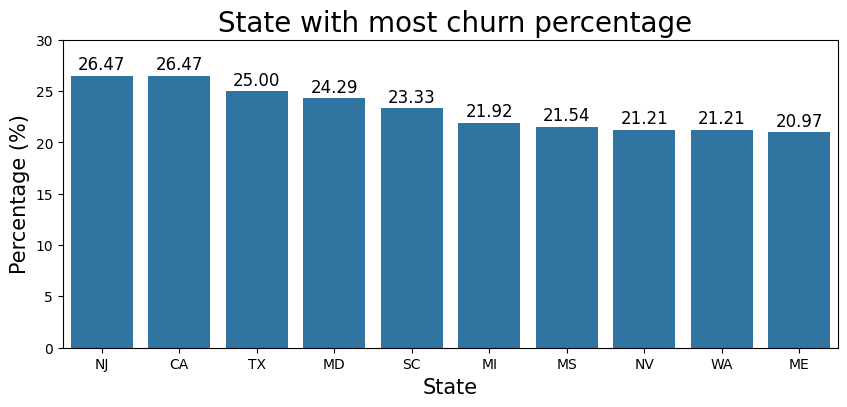

In [ ]:
# Chart - 3  State vs. average true churn percentage visualization code

# Vizualizing top 10 churned state
plt.figure(figsize=(10,4))
bar1 = ((telecom_df.groupby(['State'])['Churn'].mean()*100).sort_values(ascending = False).reset_index(name="Average True Churn ").head(10))
plots = sns.barplot(data = bar1, x = 'State', y="Average True Churn ")
for bar in plots.patches:
  plots.annotate(format(bar.get_height(),'.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

plt.title(" State with most churn percentage", fontsize = 20)
plt.xlabel('State', fontsize = 15)
plt.ylabel('Percentage (%)', fontsize = 15)
# Setting limit of the y axis from 0 to 30
plt.ylim(0,30)
plt.show()

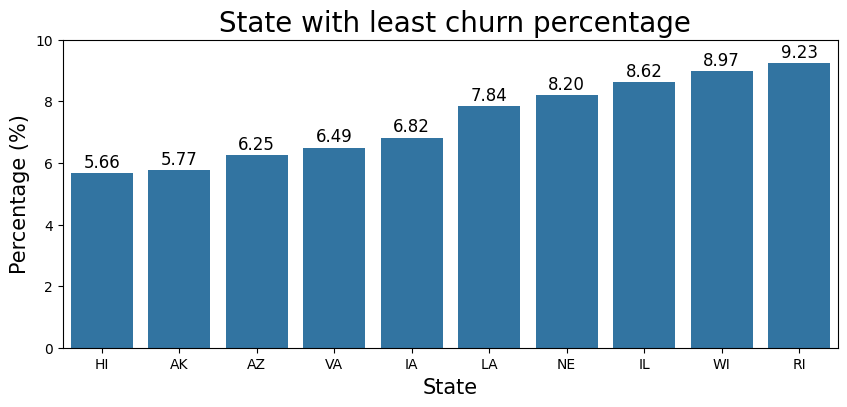

In [ ]:
# Vizualizing bottom 10 churned state
plt.figure(figsize=(10,4))
bar1 = ((telecom_df.groupby(['State'])['Churn'].mean()*100).sort_values(ascending = True).reset_index(name="Average True Churn ").head(10))
plots = sns.barplot(data = bar1, x = 'State', y="Average True Churn ")
for bar in plots.patches:
  plots.annotate(format(bar.get_height(),'.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title(" State with least churn percentage", fontsize = 20)
plt.xlabel('State', fontsize = 15)
plt.ylabel('Percentage (%)', fontsize = 15)
# Setting limit of y axis from 0 to 10
plt.ylim(0,10)
plt.show()

Churn
False    22
True      2
Name: count, dtype: int64
 
Churn
False    1378
True      225
Name: count, dtype: int64
 


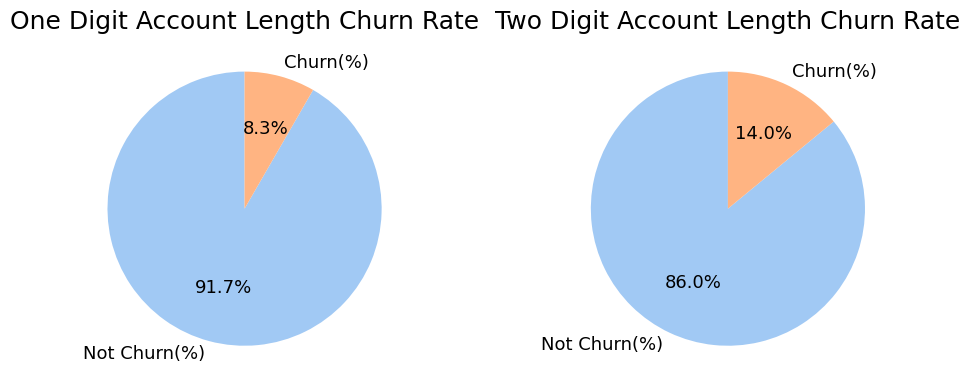

In [ ]:
# Chart - 4 One Digit and Two Digit Account Length
import matplotlib.pyplot as plt
import seaborn as sns

# One Digit Account Length
one_length = telecom_df[telecom_df['Account length'] <= 9].loc[:, ['Churn']].value_counts()
print(one_length)
print(" ")

# Two Digit Account Length
two_account = telecom_df[(telecom_df['Account length'] <= 99) & (telecom_df['Account length'] >= 10)].loc[:, ['Churn']].value_counts()
print(two_account)
print(" ")

# Visualizing One Digit and Two Digit Account Length Based on Churn percentage
colors = sns.color_palette('pastel')[0:7]
textprops = {'fontsize': 13}

# Creating subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plotting One Digit Account Length
axes[0].pie(one_length, labels=['Not Churn(%)', 'Churn(%)'], startangle=90, colors=colors, autopct="%1.1f%%", textprops=textprops)
axes[0].set_title('One Digit Account Length Churn Rate', fontsize=18)

# Plotting Two Digit Account Length
axes[1].pie(two_account, labels=['Not Churn(%)', 'Churn(%)'], startangle=90, colors=colors, autopct="%1.1f%%", textprops=textprops)
axes[1].set_title('Two Digit Account Length Churn Rate', fontsize=18)

plt.tight_layout()
plt.show()


International plan
No     3010
Yes     323
Name: count, dtype: int64
 


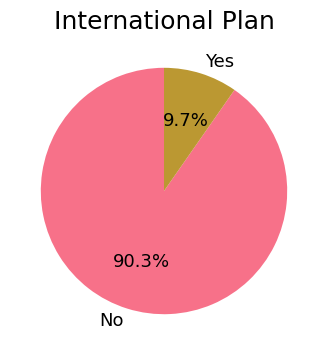

In [ ]:
# Chart - 5 visualization code KADEH MIN WAHED AMEL INTERNATIONAL PLAN

# data for international plan
inter_plan = telecom_df['International plan'].value_counts()
print(inter_plan)
print(" ")

# Visualizing Percentage of customers taken international plan
#color palette selection
colors = sns.color_palette('husl')[0:7]
textprops = {'fontsize':13}

plt.figure(figsize=(10,4))
# plotting pie chart
plt.pie(inter_plan, labels=['No','Yes'],startangle=90 , colors=colors, autopct="%1.1f%%", textprops = textprops)
plt.title('International Plan', fontsize=18)
plt.show()

In [ ]:
# Assigning values for furthur charts
i1 = telecom_df['International plan'].unique()
i2 = telecom_df.groupby('International plan')['Churn'].mean()*100
i3 = telecom_df.groupby(['International plan'])['Total intl charge'].mean()
i4 = telecom_df.groupby(["Churn"])['Total intl minutes'].mean()

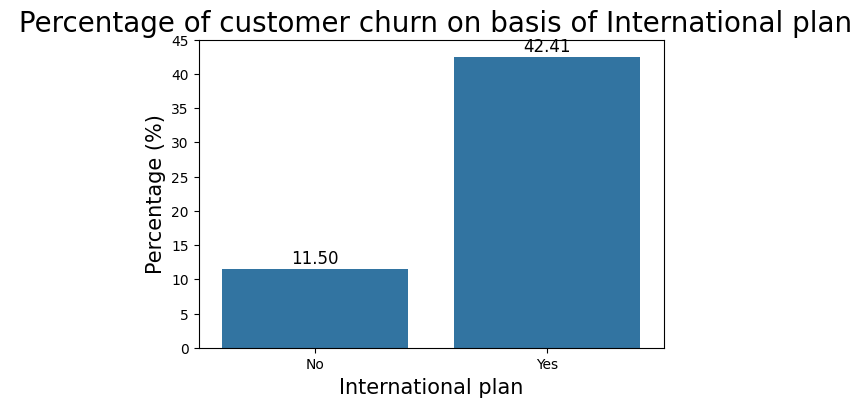

In [ ]:
# Visualizing code for people churning percentage having international plan  KADEH MIN WAHED AMEL INTERNATIONAL PLAN chur
plt.figure(figsize=(6,4))
plots = sns.barplot(x=i1,y=i2)
for bar in plots.patches:
  plots.annotate(format(bar.get_height(),'.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

plt.title(" Percentage of customer churn on basis of International plan", fontsize = 20)
plt.xlabel('International plan', fontsize = 15)
plt.ylabel('Percentage (%)', fontsize = 15)
plt.ylim(0,45)
plt.show()

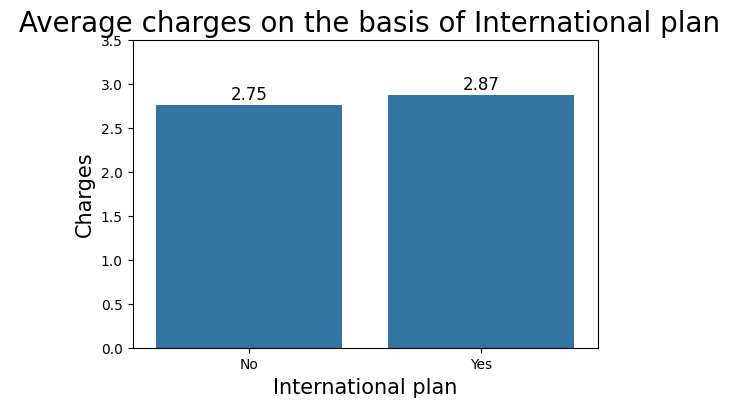

In [ ]:
# Visualizing code for average calling charge of customers having international plan
plt.figure(figsize=(6,4))
plots = sns.barplot(x=i1,y=i3)
for bar in plots.patches:
  plots.annotate(format(bar.get_height(),'.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title(" Average charges on the basis of International plan", fontsize = 20)
plt.xlabel('International plan', fontsize = 15)
plt.ylabel('Charges', fontsize = 15)
plt.ylim(0,3.5)
plt.show()

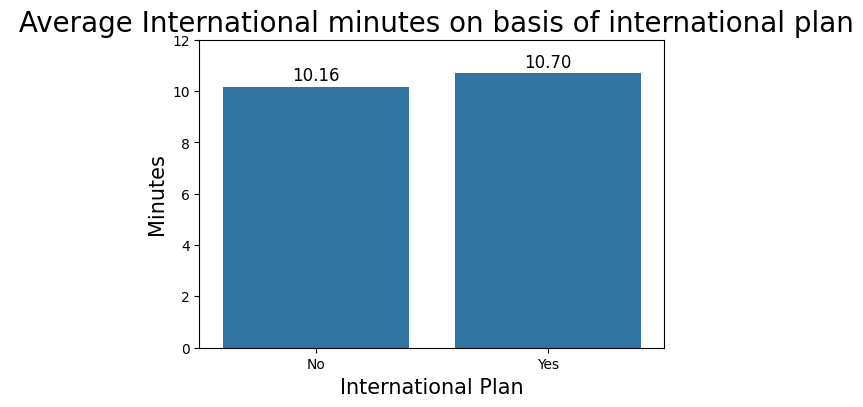

In [ ]:
# Visualizing code for average minutes talked by customers having international plan
plt.figure(figsize=(6,4))
plots = sns.barplot(x=i1,y=i4)
for bar in plots.patches:
  plots.annotate(format(bar.get_height(),'.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title(" Average International minutes on basis of international plan", fontsize = 20)
plt.xlabel('International Plan', fontsize = 15)
plt.ylabel('Minutes', fontsize = 15)
plt.ylim(0,12)
plt.show()

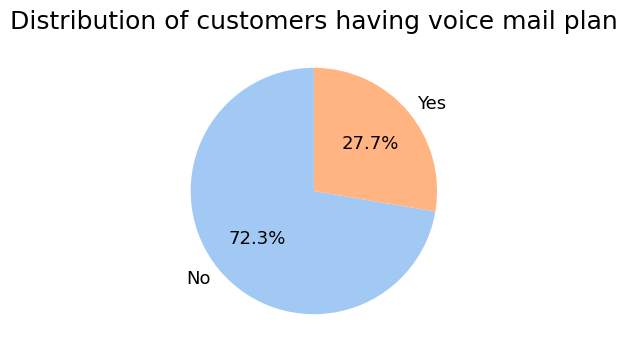

In [ ]:
# Chart - 6 visualization code

# data for voice mail plan
voice = telecom_df['Voice mail plan'].value_counts()

# vizualizing code for customers percentage having voice mail plan

#color palette selection
palette_color = sns.color_palette('pastel')
textprops = {'fontsize':13}

# plotting chart of voice mail
plt.figure(figsize=(9,4))
plt.pie(voice, labels=['No','Yes'],startangle=90 , colors=palette_color, autopct="%1.1f%%",textprops = textprops)
plt.title('Distribution of customers having voice mail plan', fontsize=18)
plt.show()

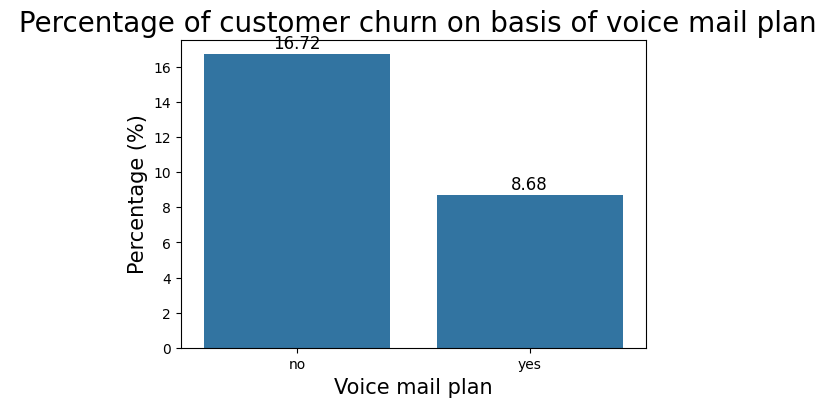

In [ ]:
# Vizualizing code for customers churning while having voice mail plan

cc1=list(['no','yes'])
cc2=telecom_df.groupby('Voice mail plan')['Churn'].mean()*100

plt.figure(figsize=(6,4))
plots = sns.barplot(x=cc1,y=cc2)
for bar in plots.patches:
  plots.annotate(format(bar.get_height(),'.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

plt.title(" Percentage of customer churn on basis of voice mail plan", fontsize = 20)
plt.xlabel('Voice mail plan', fontsize = 15)
plt.ylabel('Percentage (%)', fontsize = 15)
plt.show()

=> **VOICE MAIL**

2411 dont have a voice mail plan

922 have a voice mail plan

Among those who dont have a voice mail 16.7 % people churn.

Whereas among those who have a voice mail plan only 8.7 % people churn.


***Customers  with the Voice Mail Plan tend to churn less frequently***

Yes, voice mail plan might be considered partially.

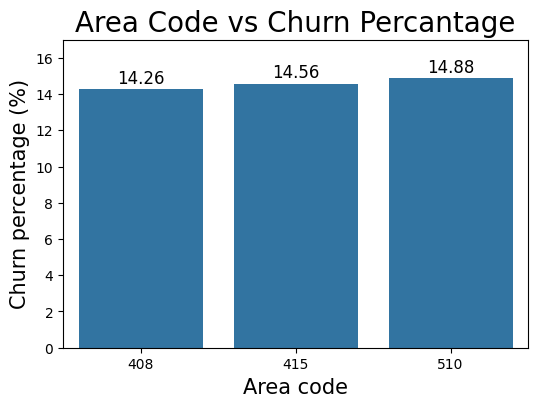

In [ ]:
# Chart - 7 visualization code
# Visualizing code for Area Code wise average churn percentage
a1= telecom_df['Area code'].unique()
b1= telecom_df.groupby('Area code')['Churn'].mean()*100

plt.figure(figsize=(6,4))
plots = sns.barplot(x=a1, y=b1)
for bar in plots.patches:
  plots.annotate(format(bar.get_height(),'.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Area Code vs Churn Percantage',fontsize=20)
plt.xlabel('Area code', fontsize = 15)
plt.ylabel('Churn percentage (%)', fontsize = 15)
plt.ylim(0,17)
plt.show()

=> All Area Code have around 14% Churn rate. So, Area Code doesn't matter.

In [ ]:
# Chart - 8 visualization code
# Average of total day calls, total day minutes & total day charge of churn
cn_dcalls = pd.DataFrame(telecom_df.groupby(["Churn"])['Total day calls'].mean())
print(cn_dcalls)
print('')
cn_dm = pd.DataFrame(telecom_df.groupby(["Churn"])['Total day minutes'].mean())
print(cn_dm)
print('')
cn_dc = pd.DataFrame(telecom_df.groupby(["Churn"])['Total day charge'].mean())
print(cn_dc)

       Total day calls
Churn                 
False       100.283158
True        101.335404

       Total day minutes
Churn                   
False         175.175754
True          206.914079

       Total day charge
Churn                  
False         29.780421
True          35.175921


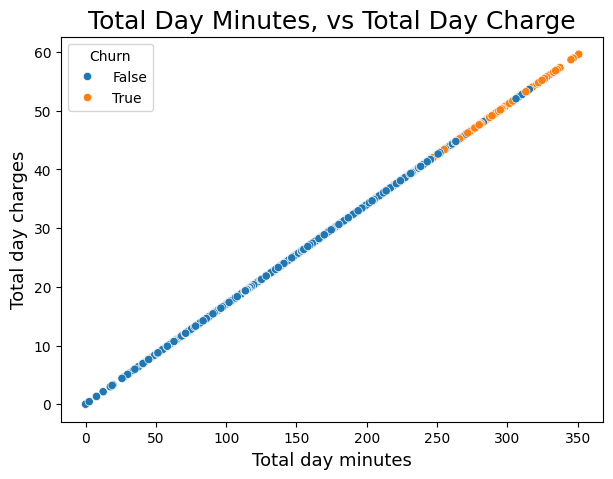

In [ ]:
# Vizualizing Total day minutes vs total day charge
plt.figure(figsize=(7,5))
sns.scatterplot(data=telecom_df, x="Total day minutes", y="Total day charge", hue="Churn")
plt.title('Total Day Minutes, vs Total Day Charge', fontsize=18)
plt.xlabel('Total day minutes',fontsize = 13)
plt.ylabel('Total day charges',fontsize = 13)
plt.show()

In [ ]:
# Average of total eve calls, total eve minutes & total evening charge of churn
cn_ecalls = pd.DataFrame(telecom_df.groupby(["Churn"])['Total eve calls'].mean())
print(cn_ecalls)
print(" ")
cn_em = pd.DataFrame(telecom_df.groupby(["Churn"])['Total eve minutes'].mean())
print(cn_em)
print(" ")
cn_ec = pd.DataFrame(telecom_df.groupby(["Churn"])['Total eve charge'].mean())
print(cn_ec)

       Total eve calls
Churn                 
False       100.038596
True        100.561077
 
       Total eve minutes
Churn                   
False         199.043298
True          212.410145
 
       Total eve charge
Churn                  
False         16.918909
True          18.054969


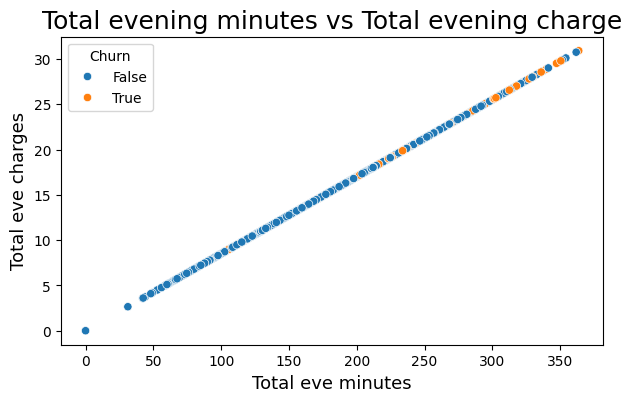

In [ ]:
# Vizualizing total evening minutes vs total evening charge
plt.figure(figsize=(7,4))
sns.scatterplot(x="Total eve minutes", y="Total eve charge", hue="Churn", data=telecom_df)
plt.title('Total evening minutes vs Total evening charge', fontsize=18)
plt.xlabel('Total eve minutes',fontsize = 13)
plt.ylabel('Total eve charges',fontsize = 13)
plt.show()

In [ ]:
# Average of total night calls, total night minutes & total night charge of churn
cn_ncalls = pd.DataFrame(telecom_df.groupby(["Churn"])['Total night calls'].mean())
print(cn_ncalls)
print(" ")
cn_nm = pd.DataFrame(telecom_df.groupby(["Churn"])['Total night minutes'].mean())
print(cn_nm)
print(" ")
cn_nc = pd.DataFrame(telecom_df.groupby(["Churn"])['Total night charge'].mean())
print(cn_nc)

       Total night calls
Churn                   
False         100.058246
True          100.399586
 
       Total night minutes
Churn                     
False           200.133193
True            205.231677
 
       Total night charge
Churn                    
False            9.006074
True             9.235528


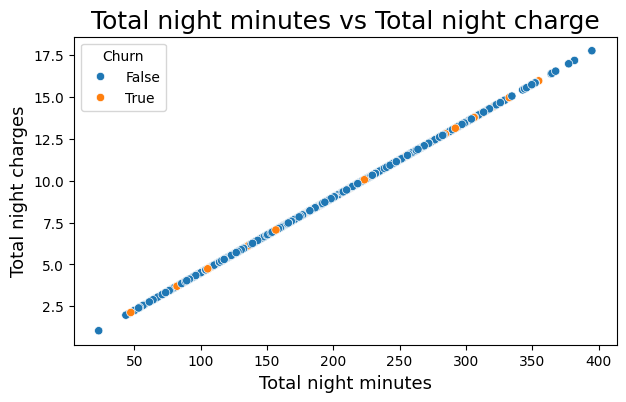

In [ ]:
# Vizualizing Total night minutes vs total night charge
plt.figure(figsize=(7,4))
sns.scatterplot(x="Total night minutes", y="Total night charge", hue="Churn", data=telecom_df)
plt.title('Total night minutes vs Total night charge', fontsize=18)
plt.xlabel('Total night minutes',fontsize = 13)
plt.ylabel('Total night charges',fontsize = 13)
plt.show()

In [ ]:
# Table of average calls of total day, eve & night on basis of churn
cn_calls = pd.merge(pd.merge(cn_dcalls,cn_ecalls, on = 'Churn'),cn_ncalls,on = 'Churn').round(2).T
cn_calls

Churn,False,True
Total day calls,100.28,101.34
Total eve calls,100.04,100.56
Total night calls,100.06,100.40


In [ ]:
# Table of average minutes of total day, eve & night on basis of churn
cn_minutes = pd.merge(pd.merge(cn_dm,cn_em, on = 'Churn'),cn_nm,on = 'Churn').round(2).T
cn_minutes

Churn,False,True
Total day minutes,175.18,206.91
Total eve minutes,199.04,212.41
Total night minutes,200.13,205.23


In [ ]:
# Table of average charges of total day, eve & night on basis of churn
cn_charges = pd.merge(pd.merge(cn_dc,cn_ec, on = 'Churn'),cn_nc,on = 'Churn').round(2).T
cn_charges

Churn,False,True
Total day charge,29.78,35.18
Total eve charge,16.92,18.05
Total night charge,9.01,9.24


=> **OVERALL CALLS**

Churn customers speak more minutes that non-churn customers at day,evening and night. Hence they pay more charge that non-churn customers.

We can retain churn customers if we include master plan.
In master plan if a customer is talking more minutes then we can charge a little less amount from him or he can get discount or additional few free minutes to talk.

This will make customers who are going to churn happy and they will not leave the company.

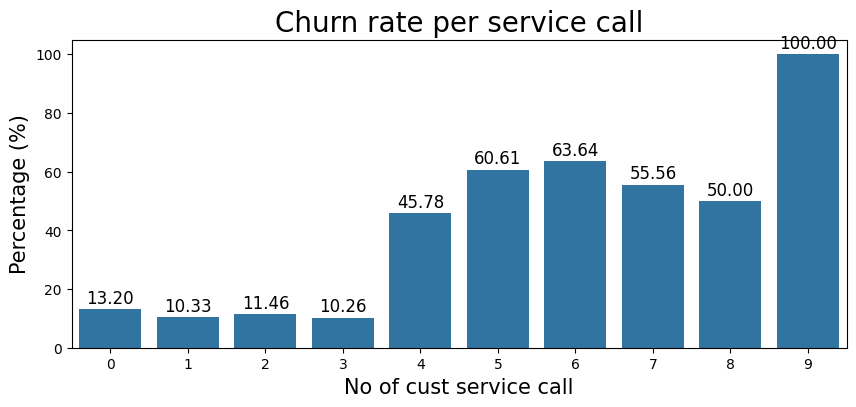

In [ ]:
# Chart - 9 visualization code
# data for customer service calls
service = pd.DataFrame(telecom_df.groupby('Customer service calls')['Churn'].mean()*100)

# Visualizing churn rate per customer service calls
plt.figure(figsize=(10,4))
plots = sns.barplot(x=service.index, y=service['Churn'])
for bar in plots.patches:
  plots.annotate(format(bar.get_height(),'.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title("Churn rate per service call", fontsize = 20)
plt.xlabel('No of cust service call', fontsize = 15)
plt.ylabel('Percentage (%)', fontsize = 15)
plt.show()

=> **CUSTOMER SERVICE CALL**

The service calls of customers varies from 0 to 9 .

Those customers who make more service calls they have a high probability of leaving.

As we can see from graph , customers with more than 5, their churning rate is more.

Hence customers who make more than 5 service calls, their queries should be solved immediately and they should be given better service so that they dont leave the company.

***Customers with four or more customer service calls churn more than four times as often as do the other customers***

Customer service is an essential factor for every business. So definitely good customer service will have a positive impact to the business. We have to look after the customer calls and customer query report resolution duration. Need to optimize the time period. If one type of issue is coming from more than 5 customers, root cause analysis should be done on that same issue and should be resolved for everyone.
Need to reduce the calls for each customer and he should be satisfied in a single call only. The customer service agents should be given great offer or recognition over great performance of customer issue resolution.

#### 2.7.3 Multivariate Analysis

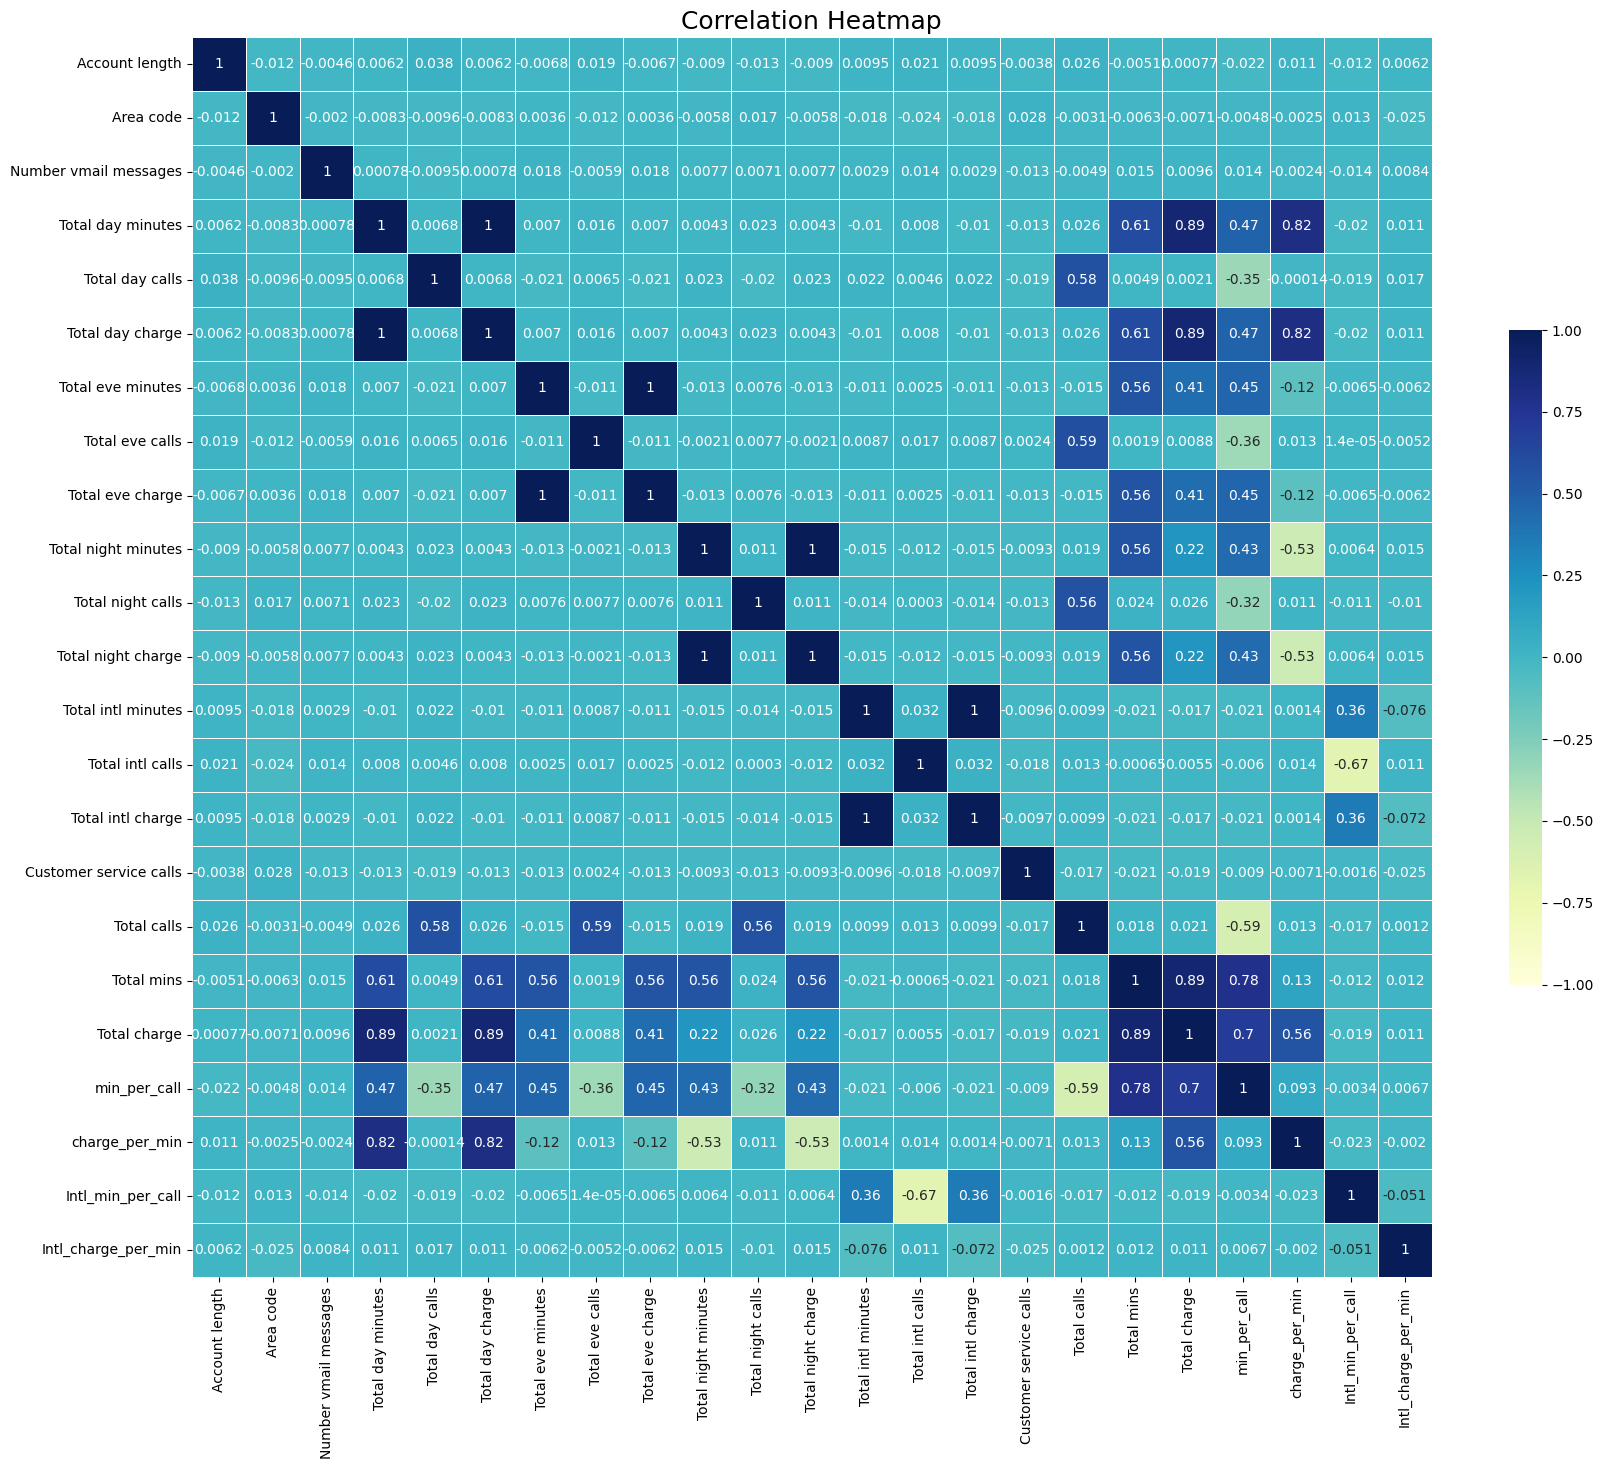

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_telecom_df = telecom_df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr = numeric_telecom_df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 17))

# Draw the heatmap with no mask
sns.heatmap(
    corr,
    cmap="YlGnBu",
    vmin=-1,
    vmax=1,
    annot=True,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5}
)

plt.title("Correlation Heatmap", fontsize=18)
plt.show()


=> From the above correlation heatmap, we can see total day charge & total day minute, total evening charge & total evening minute, total night charge & total night minute are positiveliy highly correlated with a value of 1.

Customer service call is positively correlated only with area code and negative correlated with rest variables.

Rest all correlation can be depicted from the above chart.

# **3. Data Preparation**

### 3.1 Handling Outliers

In [ ]:
def handle_outliers_all_columns(df, method='remove', multiplier=1.5, max_iter=3):
    df_cleaned = df.copy()  # Avoid modifying the original DataFrame
    numerical_cols = df_cleaned.select_dtypes(include=['number']).columns

    for _ in range(max_iter):  # Apply the process iteratively
        for col in numerical_cols:
            Q1 = df_cleaned[col].quantile(0.25)
            Q3 = df_cleaned[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - multiplier * IQR
            upper_bound = Q3 + multiplier * IQR

            if method == 'remove':
                df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
            elif method == 'replace':
                median = df_cleaned[col].median()
                df_cleaned[col] = np.where(
                    (df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound),
                    median,
                    df_cleaned[col]
                )
            elif method == 'cap':
                df_cleaned[col] = np.clip(df_cleaned[col], lower_bound, upper_bound)
            else:
                raise ValueError("Method must be 'remove', 'replace', or 'cap'.")

        # Check for convergence: Break if no more outliers
        if all(
            (df_cleaned[col] >= (df_cleaned[col].quantile(0.25) - multiplier * IQR)).all() and
            (df_cleaned[col] <= (df_cleaned[col].quantile(0.75) + multiplier * IQR)).all()
            for col in numerical_cols
        ):
            break

    return df_cleaned

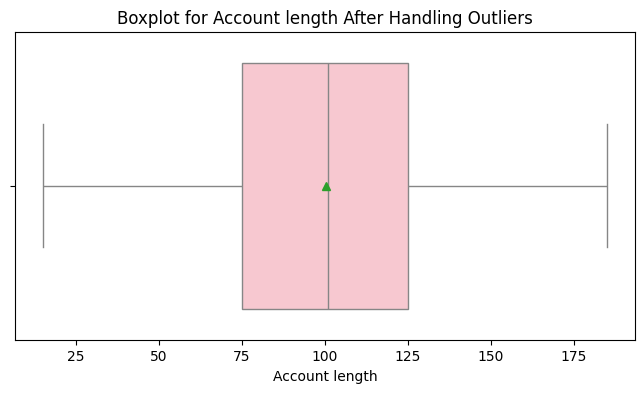

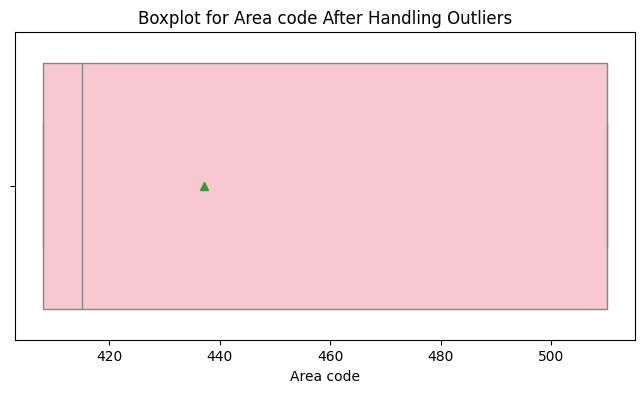

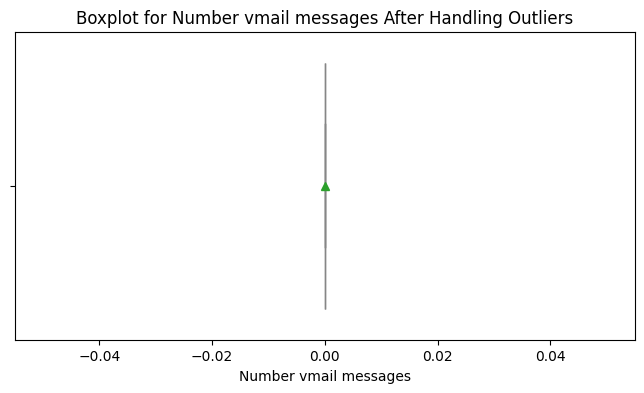

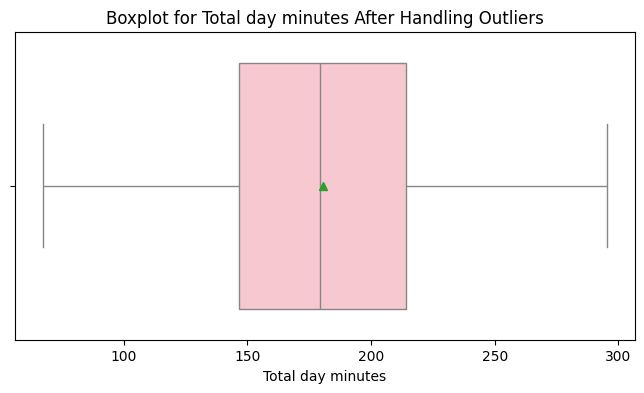

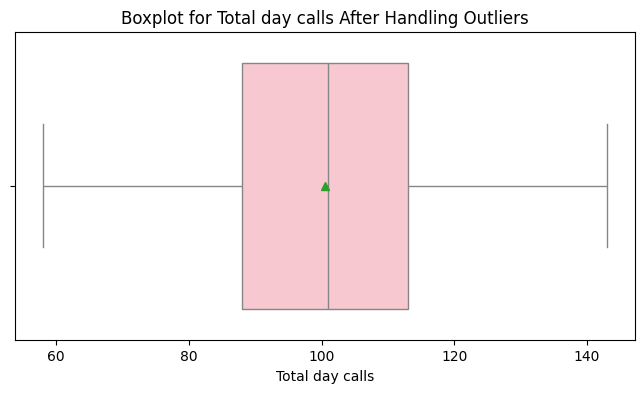

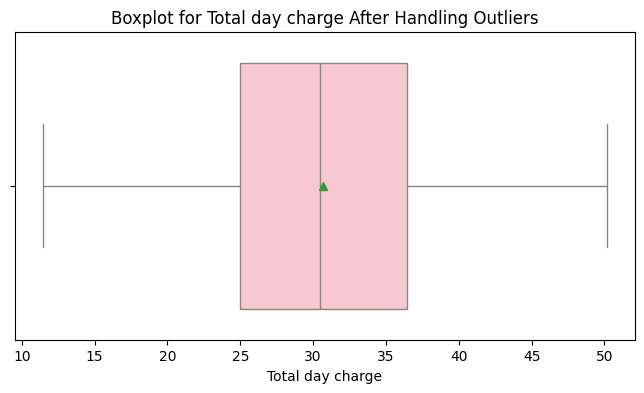

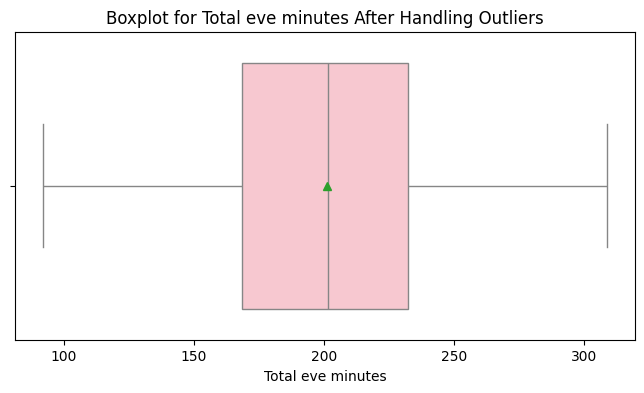

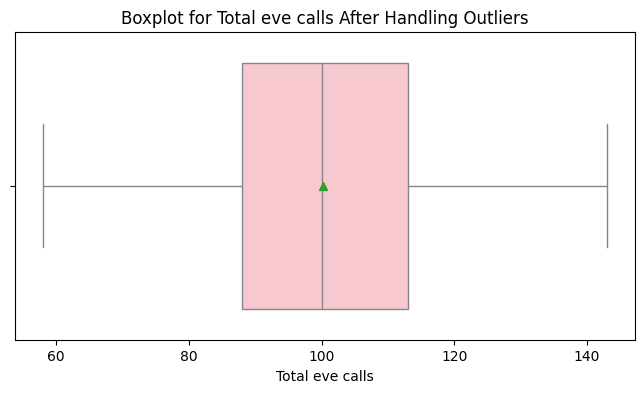

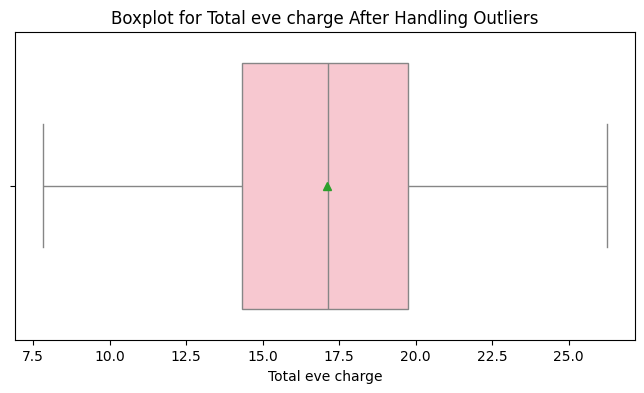

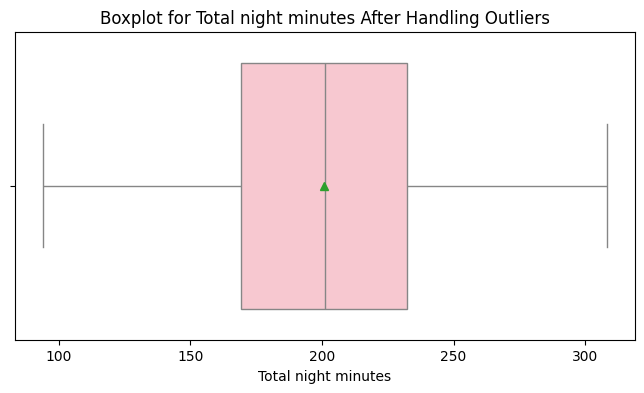

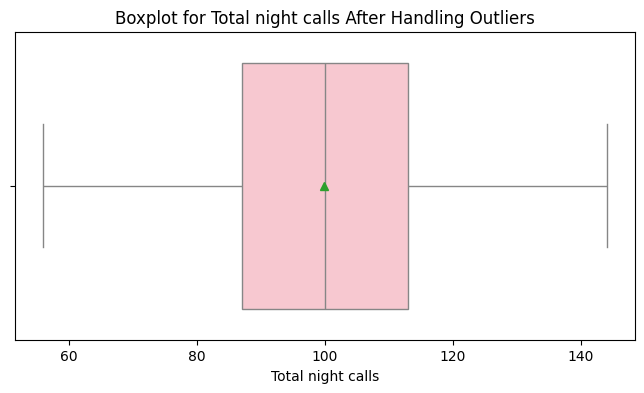

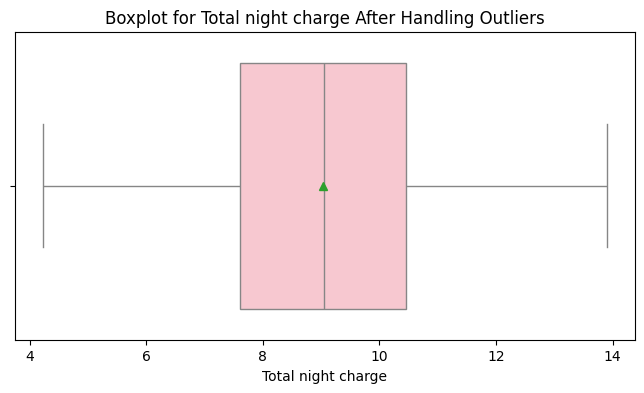

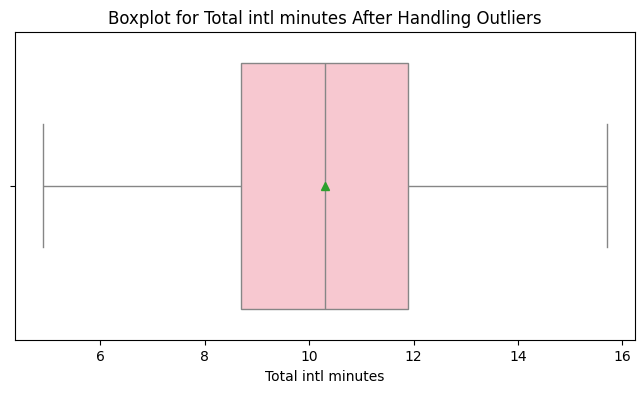

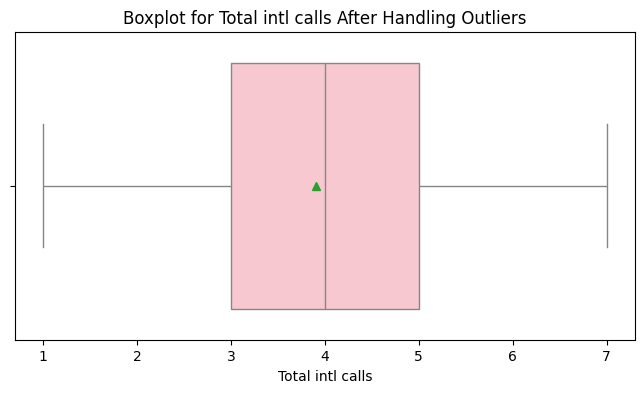

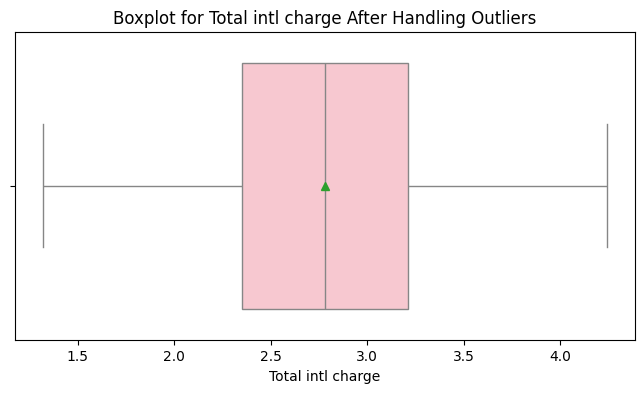

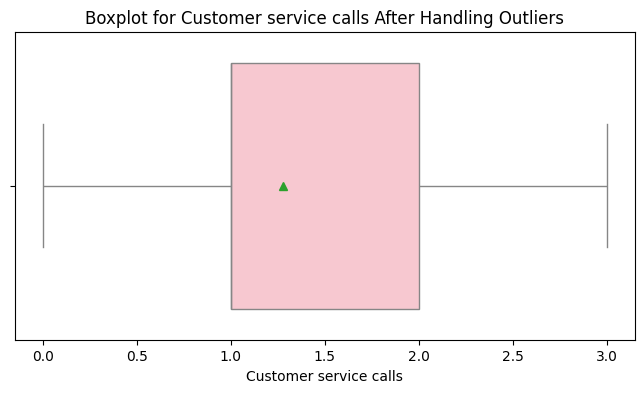

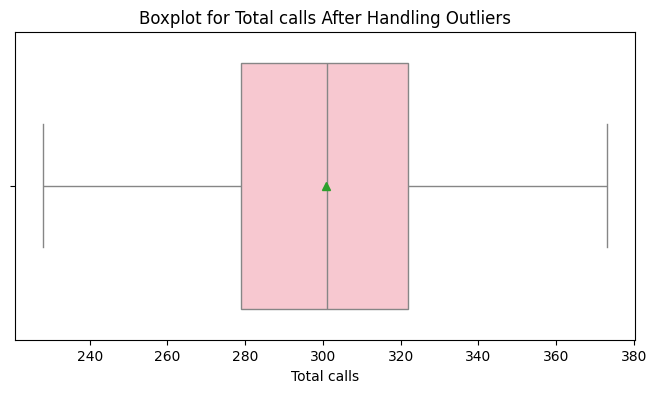

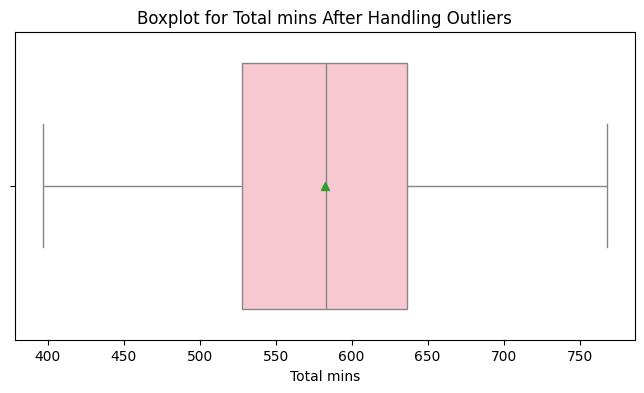

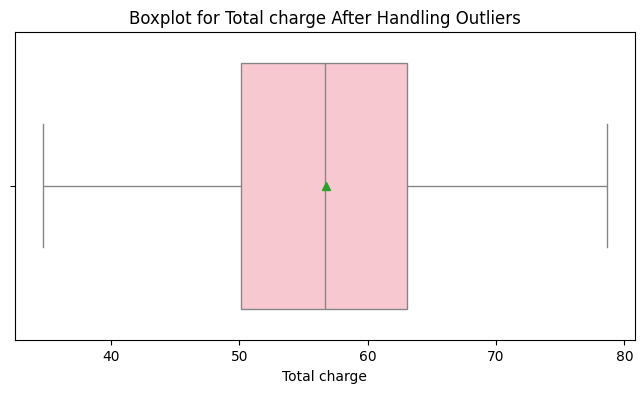

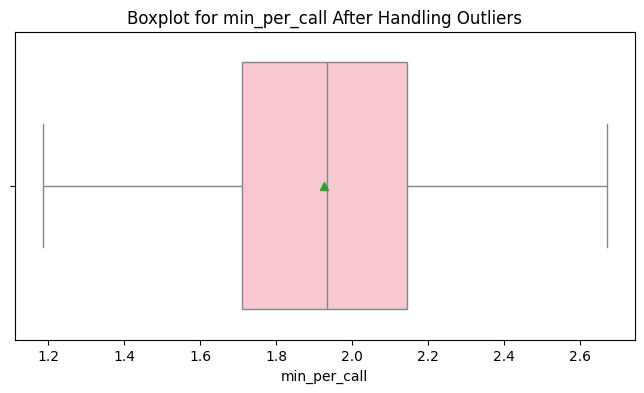

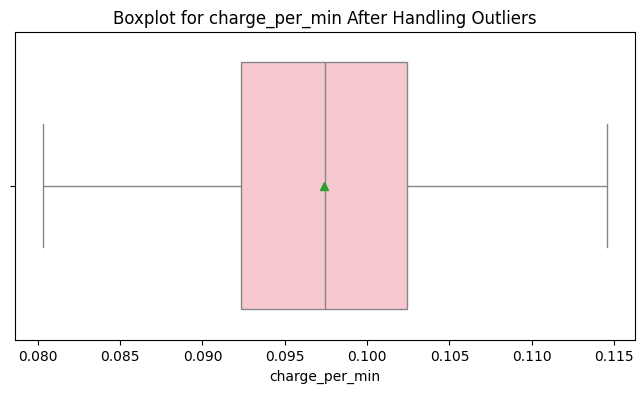

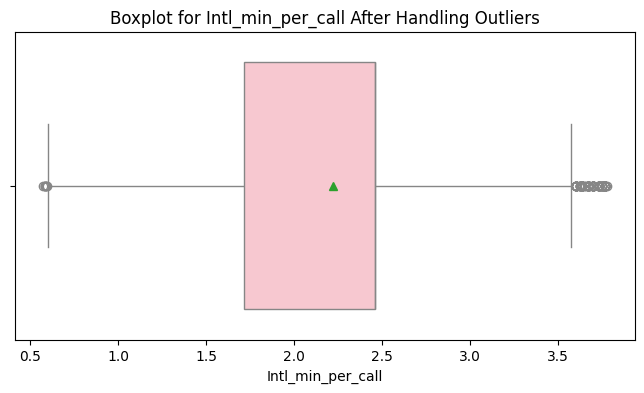

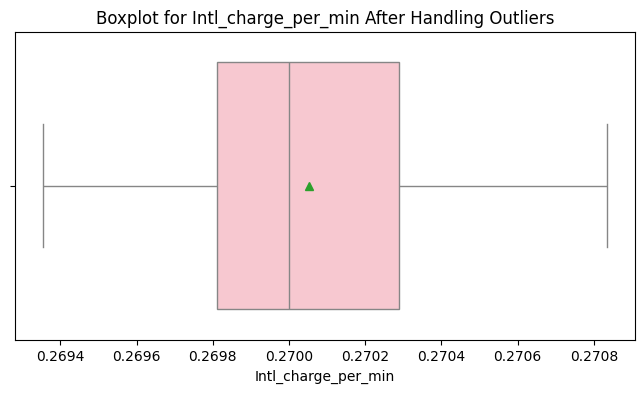

In [ ]:
# Clean the DataFrame with stricter bounds
telecom_df_cleaned = handle_outliers_all_columns(telecom_df, method='replace', multiplier=1.2, max_iter=5)

# Visualize the results with boxplots
import seaborn as sns
import matplotlib.pyplot as plt

for col in telecom_df_cleaned.select_dtypes(include='number').columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=telecom_df_cleaned[col], orient='h', showmeans=True, color='pink')
    plt.title(f"Boxplot for {col} After Handling Outliers")
    plt.xlabel(col)
    plt.show()


### 3.2 checking for means

In [ ]:
# Check mean values only for numeric columns
numeric_columns = telecom_df.select_dtypes(include=['number']).columns

# Mean values before handling outliers
print("Mean values before handling outliers:")
print(telecom_df[numeric_columns].mean())

# Handle outliers (use your outlier handling function)
telecom_df_cleaned = handle_outliers_all_columns(telecom_df, method='replace', multiplier=1.5)

# Mean values after handling outliers
print("\nMean values after handling outliers:")
print(telecom_df_cleaned[numeric_columns].mean())


Mean values before handling outliers:
Account length            101.064806
Area code                 437.182418
Number vmail messages       8.099010
Total day minutes         179.775098
Total day calls           100.435644
Total day charge           30.562307
Total eve minutes         200.980348
Total eve calls           100.114311
Total eve charge           17.083540
Total night minutes       200.872037
Total night calls         100.107711
Total night charge          9.039325
Total intl minutes         10.237294
Total intl calls            4.479448
Total intl charge           2.764581
Customer service calls      1.562856
Total calls               300.657666
Total mins                581.627483
Total charge               56.685173
min_per_call                1.960287
charge_per_min              0.097289
Intl_min_per_call           3.112385
Intl_charge_per_min         0.270057
dtype: float64

Mean values after handling outliers:
Account length            100.433543
Area code            

### 3.3 Encoding


In [ ]:
import pandas as pd

def encode_states(df):
    # Define the custom order of states
    custom_state_order = [
        'CA', 'TX', 'NY', 'FL', 'IL', 'PA', 'OH', 'MI', 'GA', 'NC', 'NJ', 'VA',
        'WA', 'AZ', 'MA', 'TN', 'IN', 'MO', 'MD', 'WI', 'CO', 'MN', 'SC', 'AL',
        'LA', 'KY', 'OR', 'OK', 'CT', 'UT', 'IA', 'NV', 'AR', 'MS', 'KS', 'NM',
        'NE', 'WV', 'ID', 'HI', 'ME', 'NH', 'RI', 'MT', 'DE', 'SD', 'ND', 'AK',
        'VT', 'WY'
    ]

    # Create an ordered categorical type with the defined order
    custom_state_category = pd.CategoricalDtype(categories=custom_state_order, ordered=True)

    # Apply the ordinal encoding to the 'State' column
    df['State'] = df['State'].astype(custom_state_category)
    df['State_encoded'] = df['State'].cat.codes

    return df


In [ ]:
telecom_df_encoded = encode_states(telecom_df_cleaned)

In [ ]:
#Verif
telecom_df_encoded

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Customer service calls,Churn,Total calls,Total mins,Total charge,min_per_call,charge_per_min,Intl_min_per_call,Intl_charge_per_min,State_encoded
0,KS,128.0,415.0,No,Yes,25.0,265.1,110.0,45.07,197.4,...,1.0,False,300.0,707.2,72.86,2.357333,0.103026,3.333333,0.270000,34
1,OH,107.0,415.0,No,Yes,26.0,161.6,123.0,27.47,195.5,...,1.0,False,329.0,611.5,55.54,1.858663,0.090826,4.566667,0.270073,6
2,NJ,137.0,415.0,No,No,0.0,243.4,114.0,41.38,121.2,...,0.0,False,328.0,527.2,59.00,1.607317,0.111912,2.440000,0.269672,10
3,OH,84.0,408.0,Yes,No,0.0,299.4,71.0,50.90,201.4,...,2.0,False,248.0,558.2,65.02,2.250806,0.116482,0.942857,0.269697,6
4,OK,75.0,415.0,Yes,No,0.0,166.7,113.0,28.34,148.3,...,3.0,False,356.0,501.9,49.36,1.409831,0.098346,3.366667,0.270297,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,WI,114.0,415.0,No,Yes,26.0,137.1,88.0,23.31,155.7,...,2.0,False,307.0,540.4,47.68,1.760261,0.088231,1.642857,0.270435,19
3329,AL,106.0,408.0,No,Yes,29.0,83.6,131.0,14.21,203.9,...,1.0,False,335.0,517.0,41.87,1.543284,0.080986,2.700000,0.270370,23
3330,VT,60.0,415.0,No,No,0.0,193.9,118.0,32.96,85.0,...,3.0,False,362.0,489.0,49.64,1.350829,0.101513,1.650000,0.269697,48
3331,WV,159.0,415.0,No,No,0.0,169.8,114.0,28.87,197.7,...,1.0,False,301.0,561.2,54.39,1.864452,0.096917,2.900000,0.269828,37


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def label_encode_columns(data, columns):
    encoding_mapping = {}
    encoded_data = data.copy()

    for col in columns:
        # Label encoding
        le = LabelEncoder()
        encoded_data[col + '_encoded'] = le.fit_transform(data[col])
        encoding_mapping[col] = dict(zip(le.classes_, le.transform(le.classes_)))

    return encoded_data, encoding_mapping


In [ ]:

# Assuming df_20_encoded and df_80_encoded are defined
telecom_df_encoded, encoding_mapping= label_encode_columns(telecom_df_encoded, ['International plan', 'Voice mail plan', 'Churn'])

In [ ]:
telecom_df_encoded

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total mins,Total charge,min_per_call,charge_per_min,Intl_min_per_call,Intl_charge_per_min,State_encoded,International plan_encoded,Voice mail plan_encoded,Churn_encoded
0,KS,128.0,415.0,No,Yes,25.0,265.1,110.0,45.07,197.4,...,707.2,72.86,2.357333,0.103026,3.333333,0.270000,34,0,1,0
1,OH,107.0,415.0,No,Yes,26.0,161.6,123.0,27.47,195.5,...,611.5,55.54,1.858663,0.090826,4.566667,0.270073,6,0,1,0
2,NJ,137.0,415.0,No,No,0.0,243.4,114.0,41.38,121.2,...,527.2,59.00,1.607317,0.111912,2.440000,0.269672,10,0,0,0
3,OH,84.0,408.0,Yes,No,0.0,299.4,71.0,50.90,201.4,...,558.2,65.02,2.250806,0.116482,0.942857,0.269697,6,1,0,0
4,OK,75.0,415.0,Yes,No,0.0,166.7,113.0,28.34,148.3,...,501.9,49.36,1.409831,0.098346,3.366667,0.270297,27,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,WI,114.0,415.0,No,Yes,26.0,137.1,88.0,23.31,155.7,...,540.4,47.68,1.760261,0.088231,1.642857,0.270435,19,0,1,0
3329,AL,106.0,408.0,No,Yes,29.0,83.6,131.0,14.21,203.9,...,517.0,41.87,1.543284,0.080986,2.700000,0.270370,23,0,1,0
3330,VT,60.0,415.0,No,No,0.0,193.9,118.0,32.96,85.0,...,489.0,49.64,1.350829,0.101513,1.650000,0.269697,48,0,0,0
3331,WV,159.0,415.0,No,No,0.0,169.8,114.0,28.87,197.7,...,561.2,54.39,1.864452,0.096917,2.900000,0.269828,37,0,0,0


**Readjusting numerical Values**

In [ ]:
#data conver
telecom_df_encoded['Account length'] =telecom_df_encoded['Account length'].astype(int)
telecom_df_encoded['Area code'] = telecom_df_encoded['Area code'].astype(int)
telecom_df_encoded['Total day calls'] = telecom_df_encoded['Total day calls'].astype(int)
telecom_df_encoded['Number vmail messages'] = telecom_df_encoded['Number vmail messages'].astype(int)
telecom_df_encoded['Total intl calls'] = telecom_df_encoded['Total intl calls'].astype(int)
telecom_df_encoded['Customer service calls'] =telecom_df_encoded['Customer service calls'].astype(int)

Vérification

In [ ]:
telecom_df_encoded

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total mins,Total charge,min_per_call,charge_per_min,Intl_min_per_call,Intl_charge_per_min,State_encoded,International plan_encoded,Voice mail plan_encoded,Churn_encoded
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,707.2,72.86,2.357333,0.103026,3.333333,0.270000,34,0,1,0
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,611.5,55.54,1.858663,0.090826,4.566667,0.270073,6,0,1,0
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,527.2,59.00,1.607317,0.111912,2.440000,0.269672,10,0,0,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,201.4,...,558.2,65.02,2.250806,0.116482,0.942857,0.269697,6,1,0,0
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,501.9,49.36,1.409831,0.098346,3.366667,0.270297,27,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,WI,114,415,No,Yes,26,137.1,88,23.31,155.7,...,540.4,47.68,1.760261,0.088231,1.642857,0.270435,19,0,1,0
3329,AL,106,408,No,Yes,29,83.6,131,14.21,203.9,...,517.0,41.87,1.543284,0.080986,2.700000,0.270370,23,0,1,0
3330,VT,60,415,No,No,0,193.9,118,32.96,85.0,...,489.0,49.64,1.350829,0.101513,1.650000,0.269697,48,0,0,0
3331,WV,159,415,No,No,0,169.8,114,28.87,197.7,...,561.2,54.39,1.864452,0.096917,2.900000,0.269828,37,0,0,0


In [ ]:
# Drop specified columns from the encoded dataframes
telecom_df_encoded.drop(['State', 'International plan', 'Voice mail plan', 'Churn'], axis=1, inplace=True)

In [ ]:
#Save the new data to csv file
telecom_df_encoded.to_csv('telecom_df_encoded.csv', index=False)

# **4. Modeling**

### 4.1 Feauture selection


In [ ]:
telecom_df_encoded=pd.read_csv('/content/telecom_df_encoded.csv')

In [ ]:
# Features and target
X = telecom_df_encoded.drop('Churn_encoded', axis=1)
y = telecom_df_encoded['Churn_encoded']

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Feature Importance:
                       Feature  Importance
13                Total charge    0.255276
9            Total intl charge    0.106050
20     Voice mail plan_encoded    0.093340
8             Total intl calls    0.078940
19  International plan_encoded    0.075635
3             Total day charge    0.048280
18               State_encoded    0.037272
14                min_per_call    0.036943
6            Total night calls    0.035950
2              Total day calls    0.029300
16           Intl_min_per_call    0.026530
10      Customer service calls    0.025903
11                 Total calls    0.025700
4              Total eve calls    0.024059
5             Total eve charge    0.022367
7           Total night charge    0.018514
12                  Total mins    0.017269
15              charge_per_min    0.015985
17         Intl_charge_per_min    0.015248
0               Account length    0.006803
1        Number vmail messages    0.004637


<ipython-input-361-18c89ec5642c>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


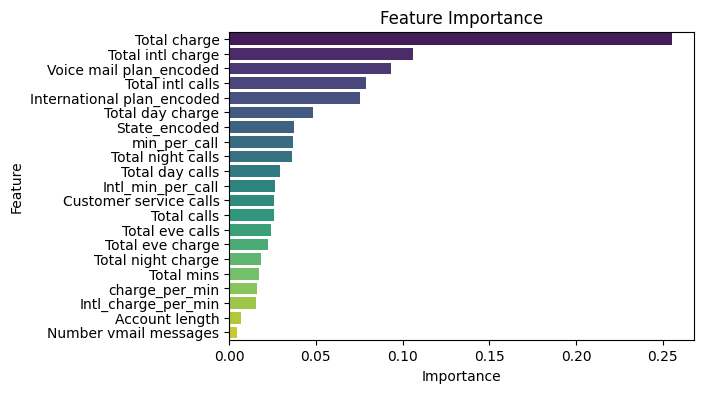

In [ ]:
# Train Decision Tree model according to paper 1
rf_model = DecisionTreeClassifier(random_state=42)  # Adjust `n_estimators` and other parameters as needed
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_

# Display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(feature_importance_df)

# Plot feature importances
plt.figure(figsize=(6, 4))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance')
plt.show()


Feature Importance:
                       Feature  Importance
13                Total charge    0.153424
3             Total day charge    0.085208
12                  Total mins    0.081793
19  International plan_encoded    0.073519
9            Total intl charge    0.053340
15              charge_per_min    0.048579
16           Intl_min_per_call    0.045448
5             Total eve charge    0.042460
8             Total intl calls    0.040034
1        Number vmail messages    0.039160
14                min_per_call    0.037422
6            Total night calls    0.037015
11                 Total calls    0.034009
7           Total night charge    0.033818
0               Account length    0.032413
2              Total day calls    0.031881
17         Intl_charge_per_min    0.031057
4              Total eve calls    0.030531
18               State_encoded    0.028099
20     Voice mail plan_encoded    0.024856
10      Customer service calls    0.015934


<ipython-input-364-5a1af1c2a45d>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


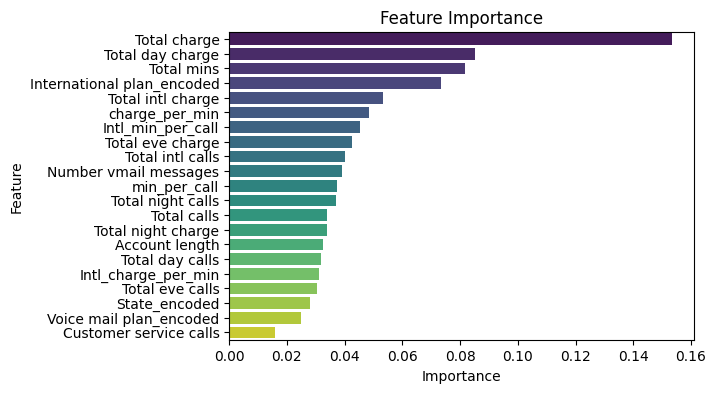

In [ ]:
# Train rf model according to paper 1
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_

# Display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(feature_importance_df)

# Plot feature importances
plt.figure(figsize=(6, 4))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance')
plt.show()


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("VIF Data for df_encoded:\n", vif_data)

=> the highest VIF values are:

Total day minutes,Total day charge ,Total eve minutes,Total eve charge

In [ ]:
# Columns to eliminate(multicol +importance<0.01)
columns_to_drop = [
    'Total day minutes',
    'Total eve minutes',
    'Total night minutes',
    'Total intl minutes',
    'Area code',
]

telecom_df_encoded = telecom_df_encoded.drop(columns=columns_to_drop, axis=1)

# Features and target
X = telecom_df_encoded.drop('Churn_encoded', axis=1)
y = telecom_df_encoded['Churn_encoded']

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X

,Account length,Number vmail messages,Total day calls,Total day charge,Total eve calls,Total eve charge,Total night calls,Total night charge,Total intl calls,Total intl charge,...,Total calls,Total mins,Total charge,min_per_call,charge_per_min,Intl_min_per_call,Intl_charge_per_min,State_encoded,International plan_encoded,Voice mail plan_encoded
0,128,25,110,45.07,99.0,16.78,91.0,11.01,3,2.70,...,300.0,707.2,72.86,2.357333,0.103026,3.333333,0.270000,34,0,1
1,107,26,123,27.47,103.0,16.62,103.0,11.45,3,3.70,...,329.0,611.5,55.54,1.858663,0.090826,4.566667,0.270073,6,0,1
2,137,0,114,41.38,110.0,10.30,104.0,7.32,5,3.29,...,328.0,527.2,59.00,1.607317,0.111912,2.440000,0.269672,10,0,0
3,84,0,71,50.90,88.0,17.12,89.0,8.86,7,1.78,...,248.0,558.2,65.02,2.250806,0.116482,0.942857,0.269697,6,1,0
4,75,0,113,28.34,122.0,12.61,121.0,8.41,3,2.73,...,356.0,501.9,49.36,1.409831,0.098346,3.366667,0.270297,27,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,114,26,88,23.31,125.0,13.23,94.0,11.14,7,3.11,...,307.0,540.4,47.68,1.760261,0.088231,1.642857,0.270435,19,0,1
3329,106,29,131,14.21,131.0,17.33,73.0,10.33,3,2.19,...,335.0,517.0,41.87,1.543284,0.080986,2.700000,0.270370,23,0,1
3330,60,0,118,32.96,110.0,7.23,134.0,9.45,8,3.56,...,362.0,489.0,49.64,1.350829,0.101513,1.650000,0.269697,48,0,0
3331,159,0,114,28.87,105.0,16.80,82.0,8.72,4,3.13,...,301.0,561.2,54.39,1.864452,0.096917,2.900000,0.269828,37,0,0


### 4.2 Training


#### 4.1.1 Data resampling

SMOTE generates synthetic samples to address class imbalance in your dataset, ensuring that the minority class is better represented.

ENN removes noisy and borderline samples from the dataset, improving the quality of the resampled data.

In [ ]:
  def prepare_data(X_train, y_train):
        from imblearn.over_sampling import SMOTE
        from imblearn.under_sampling import EditedNearestNeighbours

        smote = SMOTE(sampling_strategy='minority', random_state=123)
        enn = EditedNearestNeighbours()
        X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
        X_resampled, y_resampled = enn.fit_resample(X_resampled, y_resampled)

        if visualize_resampling:
            fig, axes = plt.subplots(1, 2, figsize=(14, 5))
            sns.countplot(x=y_train, ax=axes[0])
            axes[0].set_title("Class Distribution Before Resampling")
            sns.countplot(x=y_resampled, ax=axes[1])
            axes[1].set_title("Class Distribution After Resampling")
            plt.show()

        return X_resampled, y_resampled


#### 4.1.2 Training and testing 

In [ ]:
def train_classification_models(X, y, resample=False, visualize_resampling=False):
    def prepare_data(X_train, y_train):
        from imblearn.over_sampling import SMOTE
        from imblearn.under_sampling import EditedNearestNeighbours

        smote = SMOTE(sampling_strategy='minority', random_state=123)
        enn = EditedNearestNeighbours()
        X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
        X_resampled, y_resampled = enn.fit_resample(X_resampled, y_resampled)

        if visualize_resampling:
            fig, axes = plt.subplots(1, 2, figsize=(14, 5))
            sns.countplot(x=y_train, ax=axes[0])
            axes[0].set_title("Class Distribution Before Resampling")
            sns.countplot(x=y_resampled, ax=axes[1])
            axes[1].set_title("Class Distribution After Resampling")
            plt.show()

        return X_resampled, y_resampled

    # Split dataset into training and testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    if resample:
        X_train, y_train = prepare_data(X_train, y_train)

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Define models and optimized parameter grids
    models = {
    'SVC': (SVC(), {
        'C': [0.1, 1, 10],  # Focus on a smaller, impactful range
        'kernel': ['linear', 'rbf'],  # Avoid 'poly' to reduce complexity
        'gamma': ['scale']
    }),
    'Random Forest': (RandomForestClassifier(random_state=42), {
        'n_estimators': [50, 100],  # Reduce the range
        'max_depth': [10, 20],  # Omit 'None' for faster computation
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }),
    'Logistic Regression': (LogisticRegression(max_iter=500), [  # Balanced regularization search
        {'penalty': ['l2'], 'C': [0.1, 1, 10], 'solver': ['liblinear']},
        {'penalty': ['l1'], 'C': [0.1, 1], 'solver': ['liblinear']}
    ]),
    'Gradient Boosting': (GradientBoostingClassifier(random_state=42), {
        'n_estimators': [50, 100],  # Smaller range
        'learning_rate': [0.05, 0.1],  # Focused on common values
        'max_depth': [3, 5],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }),
    'Neural Network': (MLPClassifier(max_iter=300, random_state=42), {
        'hidden_layer_sizes': [(50,), (100,)],  # Limit to fewer configurations
        'activation': ['relu'],  # Focus on default activation
        'solver': ['adam'],  # Avoid 'sgd' for time efficiency
        'alpha': [0.0001, 0.001],
        'learning_rate': ['constant']  # Avoid 'adaptive' for simplicity
    })
}


    best_models = {}

    # Train and optimize each model using GridSearchCV
    for name, (model, params) in models.items():
        print(f"Training {name}...")
        grid = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='accuracy', n_jobs=-1)
        grid.fit(X_train_scaled, y_train)
        best_models[name] = grid.best_estimator_
        print(f"Best parameters for {name}: {grid.best_params_}")
        print(f"Best cross-validated accuracy for {name}: {grid.best_score_:.4f}\n")

    # Evaluate models on the test set
    for name, model in best_models.items():
        print(f"Evaluating {name}...")
        y_pred = model.predict(X_test_scaled)
        print(f"Accuracy for {name}: {accuracy_score(y_test, y_pred):.4f}")
        print(classification_report(y_test, y_pred))

        ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test)
        plt.title(f"Confusion Matrix for {name}")
        plt.show()

    # Save models
    joblib.dump(best_models, 'best_models.joblib')

    return best_models


In [ ]:
from sklearn.neural_network import MLPClassifier

best_models_original = train_classification_models(X, y, resample=False, visualize_resampling=False)

In [ ]:
best_models = train_classification_models(X, y, resample=True, visualize_resampling=True)

# **5. Evaluation**

In [ ]:
import joblib
import pandas as pd
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve, classification_report
)
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Prepare Data Function
def prepare_data(X_train, y_train, visualize_resampling=True):
    from imblearn.over_sampling import SMOTE
    from imblearn.under_sampling import EditedNearestNeighbours

    smote = SMOTE(sampling_strategy='minority', random_state=123)
    enn = EditedNearestNeighbours()
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
    X_resampled, y_resampled = enn.fit_resample(X_resampled, y_resampled)

    if visualize_resampling:
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))
        sns.countplot(x=y_train, ax=axes[0])
        axes[0].set_title("Class Distribution Before Resampling")
        sns.countplot(x=y_resampled, ax=axes[1])
        axes[1].set_title("Class Distribution After Resampling")
        plt.show()

    return X_resampled, y_resampled

# Function to evaluate models on test data
def evaluate_models_on_test(models, X_test, y_test, title_suffix=""):
    results = []

    # Scale the test data
    scaler = StandardScaler()
    X_test_scaled = scaler.fit_transform(X_test)

    for name, model in models.items():
        print(f"Evaluating {name} ({title_suffix})...")

        # Predict probabilities
        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_test_scaled)[:, 1]
        elif hasattr(model, "decision_function"):
            y_proba = model.decision_function(X_test_scaled)
            y_proba = (y_proba - y_proba.min()) / (y_proba.max() - y_proba.min())  # Normalize
        else:
            y_proba = model.predict(X_test_scaled)

        # Find optimal threshold
        optimal_threshold = find_optimal_threshold(y_test, y_proba)
        y_pred = (y_proba >= optimal_threshold).astype(int)

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, pos_label=1)
        recall = recall_score(y_test, y_pred, pos_label=1)
        f1 = f1_score(y_test, y_pred, pos_label=1)
        roc_auc = roc_auc_score(y_test, y_proba)

        results.append({
            'Model': name + f" ({title_suffix})",
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'ROC-AUC': roc_auc
        })

        # Plot ROC curve
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.plot(fpr, tpr, label=f"{name} ({title_suffix}) (AUC = {roc_auc:.2f})")

    return pd.DataFrame(results)

# Function to find optimal threshold
def find_optimal_threshold(y_true, y_proba):
    thresholds = np.linspace(0, 1, 101)
    f1_scores = [f1_score(y_true, (y_proba >= t).astype(int)) for t in thresholds]
    return thresholds[np.argmax(f1_scores)]

# Load models
best_models = joblib.load('best_models.joblib')

# ---------------- BEFORE RESAMPLING ----------------
print("Evaluation on Original Test Data")
before_results = evaluate_models_on_test(best_models, X_test, y_test, title_suffix="Before Resampling")

# ---------------- AFTER RESAMPLING ----------------
print("\nResampling Data Using SMOTE + ENN...")
X_resampled, y_resampled = prepare_data(X_train, y_train)

print("Evaluation on Resampled Test Data")
after_results = evaluate_models_on_test(best_models, X_resampled, y_resampled, title_suffix="After Resampling")

# ---------------- COMBINE RESULTS ----------------
all_results = pd.concat([before_results, after_results], ignore_index=True)

# ---------------- PLOT COMPARISON ROC CURVES ----------------
plt.figure(figsize=(10, 6))
evaluate_models_on_test(best_models, X_test, y_test, title_suffix="Before Resampling")
evaluate_models_on_test(best_models, X_resampled, y_resampled, title_suffix="After Resampling")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Comparison of ROC Curves (Before vs After Resampling)")
plt.legend(loc="lower right")
plt.show()

# Display Results Table
print("\nFinal Evaluation Results:")
print(all_results)


In [ ]:
#shap with rf model doen't give a coherent graph so we opted for gb model

explainer = shap.TreeExplainer(gb_model)
shap_values = explainer.shap_values(X_train)

# Plot summary
shap.summary_plot(shap_values, X_train)


(Paper 3+ shap analysis)

=> **The SHAP analysis for the churn prediction model in telecommunications highlights that** Total day charge, International plan_encoded, and Voice mail plan_encoded are key factors influencing customer churn. Customers with higher daily charges and certain plan types are more likely to churn.

**Proposed Solutions:**

**Tailored Pricing Plans:** Offer tiered pricing to reduce churn among customers with high daily charges.

**Enhanced Communication:** Focus on customers with specific plan types (e.g., international plans) to emphasize loyalty benefits and retention.

**Segmented Marketing:** Target high-risk customers with personalized promotions, such as discounts or service bundles.

**SHAP insights help telecom operators predict churn more accurately and implement targeted retention strategies.**


# **6. Deployement**

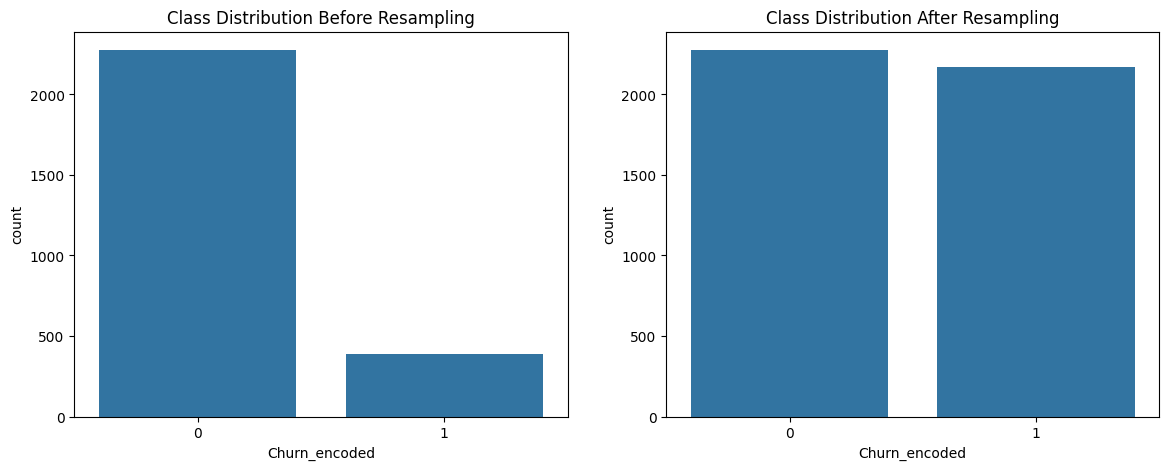

['rf_model.joblib']

In [ ]:
import joblib
X_resampled, y_resampled= prepare_data(X_train, y_train)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_resampled, y_resampled)
joblib.dump(rf_model, 'rf_model.joblib')